# Spotify Analysis: Study of song factors and the positive correlation to streaming

## Members
- Joey Beightol
- Ryan Lucero
- Matthew Parker

## Table of Contents 

* Intro 
* Literature Review
* Original Research Question 
* Dataset 1 – Most Streamed Spotify Songs 2023 
* Data Wrangling and Cleaning for Datset 1 
* Visualization for Dataset 1 
* Dataset 1 Correlation and Analysis 
* Conclusions 
* Dataset 2 and Revised Research Question 
* Cleaning and Combining the Two Datasets 
* Analysis 
* Genre Correlation and Lasso Regression 
* Clustering 
* Conclusions 
* References 

# Intro

Over the past few decades, listening and creating music has become a lot more accesible. With this, more and more music is being created, more genres are being developed and more audiences are being reached. With everyone having their own taste in music, we want to explore what makes a song 'good' or 'succesful'. One way to measure success is the amount of streams a song has.

# Literature Review

Researchers at Carleton University concluded that song features to do not directly correlate to its popluarity, suggesting that contextual factors instead of musical features are stronger indicators of a songs success. Their study also suggestes that elements affecting song popularity change over time (https://newsroom.carleton.ca/story/big-data-predict-song-popularity/).

Researchers at Stanford University came to a similar conclusion. Using a different set of factors and a dataset of one milllion songs dating back to 2011, they found that sonic features of a song were far less predictive of it's popularity than its metadata features (https://cs229.stanford.edu/proj2015/140_report.pdf).


# Research Question and Task Definition
Our goal is to analyze what combination of surveyed factors (danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness, etc.) are most positively correlated with streams for a song on Spotify. We want to explore the conclusion drawn by Carleton and Stanford as well as see if song features correlate positively to streams based on contextual factors such as genre.

In our analysis, we are inputing the two datasets and creating a correlation matrix to see what aspects of songs cause the song to be listened to more (amount of streams). We are also conducting a regression tree analysis on each genre to see exactly what aspects of the highest correlating values lead to the highest streaming songs.


# Dataset 1 - Most Streamed Spotify Songs 2023
- Most Streamed Spotify Songs 2023: This dataset is made up of the 943 most famous songs on Spotify for 2023 and was collected by Kaggle user Nidula Elgiriyewithana (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). 


The data was collected for exploratory analysis into patterns that may effect overall streams, popularity on specific platforms, trends in musical attributes or preferences etc. 

## Song Feature Details
The data set includes 24 different features:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song
- track_genre
- popularity



# Data Wrangling

## Import Libraries
The libraries being utilized in this project are:
- pandas: to create and easily manipulate dataframes
- numpy: combined with dataframes to check column information in dataframes
- matplotlib/seaborn: visualize data
- sklearn: utilized for regression tree analysis, lasso regression and mean squared error

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



## Load in Data

In [120]:
# Load data from a CSV file into a DataFrame
spotifyDF = pd.read_csv('spotify-2023.csv', encoding='latin-1')

## Data Cleaning

### Most Streamed 2023

In [121]:
# Display the first few rows of the DataFrame
display(spotifyDF.head(5))

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [186]:
spotifyDF = spotifyDF.drop(columns=['released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'])

In [123]:
#look at types
spotifyDF.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [187]:
#Removing any types that are not a number in streams column
spotifyDF = spotifyDF.dropna(subset=['streams'])
spotifyDF= spotifyDF.reset_index(drop=True)
spotifyDF['streams'] = spotifyDF['streams'].astype(int)
spotifyDF.dtypes

track_name            object
artists               object
artist_count           int64
streams                int64
bpm                    int64
key                   object
mode                  object
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
key_encoded            int64
dtype: object

In [125]:
#Removing any types that are not a number in streams column
spotifyDF = spotifyDF.dropna(subset=['streams'])
spotifyDF= spotifyDF.reset_index(drop=True)
spotifyDF.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [188]:
#describe the dataframe
spotifyDF.describe()

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
count,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,5.141374e+08,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,5.741597
std,0.893331,5.668569e+08,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,3.527634
min,1.000000,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.000000,1.416362e+08,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,3.000000
50%,1.000000,2.905309e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,6.000000
75%,2.000000,6.738690e+08,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,9.000000
max,8.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,11.000000


In [189]:
#Find all null values
spotifyDF.isnull().sum()

track_name             0
artists                0
artist_count           0
streams                0
bpm                    0
key                   95
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
key_encoded            0
dtype: int64

In [190]:
#Key null values
keyNullDF = spotifyDF[spotifyDF['key'].isnull()]
display(keyNullDF)

,track_name,artists,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
12,Flowers,Miley Cyrus,1,1316855716,118,NaN,Major,71,65,68,6,0,3,7,11
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,30546883,78,NaN,Major,44,14,9,96,0,10,3,11
22,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,123122413,120,NaN,Major,81,63,68,11,0,11,4,11
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,65156199,144,NaN,Major,77,75,58,52,0,23,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,Hold Me Closer,"Elton John, Britney Spears",2,284216603,126,NaN,Major,67,49,77,11,0,19,11,11
900,After LIKE,IVE,1,265548837,125,NaN,Major,68,80,92,10,0,9,12,11
902,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,244585109,137,NaN,Major,74,71,89,24,61,15,5,11
937,Labyrinth,Taylor Swift,1,187339835,110,NaN,Major,48,15,31,80,22,12,4,11


In [191]:
#Duplication
print(spotifyDF.duplicated().sum())
spotifyDF = spotifyDF.drop_duplicates()
print(spotifyDF.duplicated().sum())

1
0


# Visualizations for Dataset 1

We ran various visualizations for different song features and the number of streams and there were no patterns of correlation visible

#### Month Realeased Streams

Total Streams


,streams
released_month,
1,9.675832e+10
5,5.320564e+10
11,4.420738e+10
10,4.298988e+10
9,4.114008e+10


Average Streams


,streams
released_month,
9,7.346444e+08
1,7.275061e+08
8,6.312657e+08
10,5.889024e+08
11,5.525923e+08


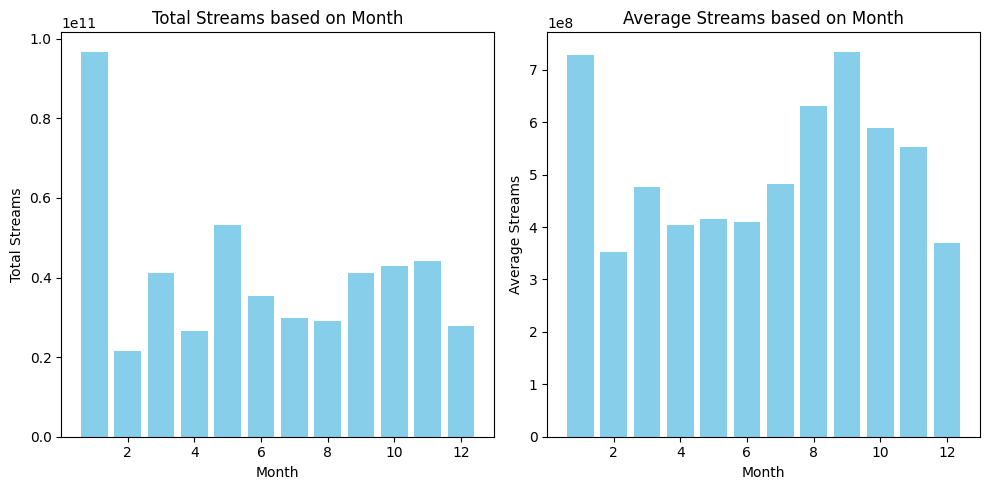

In [129]:
#Total streams based on danceability
monthlyStreams = pd.pivot_table(spotifyDF, values='streams', index='released_month', aggfunc='sum')
print('Total Streams')
display(monthlyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on danceability
monthlyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='released_month', aggfunc='mean')
print('Average Streams')
display(monthlyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Month
axs[0].bar(monthlyStreams.index, monthlyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Month')
#Average streams vs. Month
axs[1].bar(monthlyStreamAvg.index, monthlyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Month')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### BPM and Streams

Total Streams


,streams
bpm,
120,1.789501e+10
110,1.389453e+10
95,1.368051e+10
124,1.202015e+10
92,1.173570e+10


Average Streams


,streams
bpm,
171,2.409867e+09
179,1.735442e+09
186,1.718833e+09
181,1.256881e+09
111,1.230280e+09


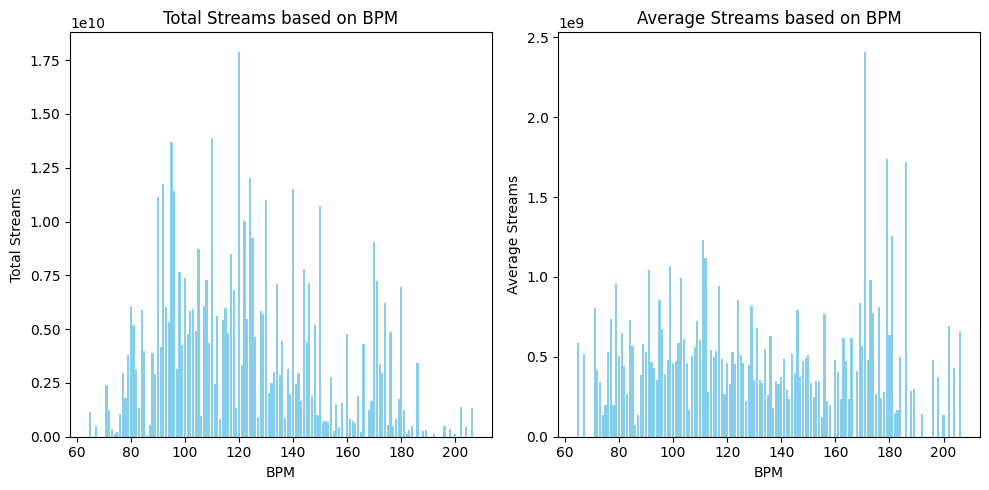

In [130]:
#Total streams based on BPM
bpmStreams = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='sum')
print('Total Streams')
display(bpmStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on BPM
bpmStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='bpm', aggfunc='mean')
print('Average Streams')
display(bpmStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. BPM
axs[0].bar(bpmStreams.index, bpmStreams['streams'], color='skyblue')
axs[0].set_xlabel('BPM')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on BPM')
#Average streams vs. BPM
axs[1].bar(bpmStreamAvg.index, bpmStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('BPM')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on BPM')
# Adjust layout
plt.tight_layout()
# Show the plot

#### Streams based on Speachiness

Total Streams


,streams
speechiness_%,
3,9.269137e+10
4,8.691274e+10
5,7.503727e+10
6,3.727406e+10
8,2.815813e+10


Average Streams


,streams
speechiness_%,
2,1.468183e+09
44,1.155506e+09
18,8.654915e+08
37,7.983765e+08
28,7.914525e+08


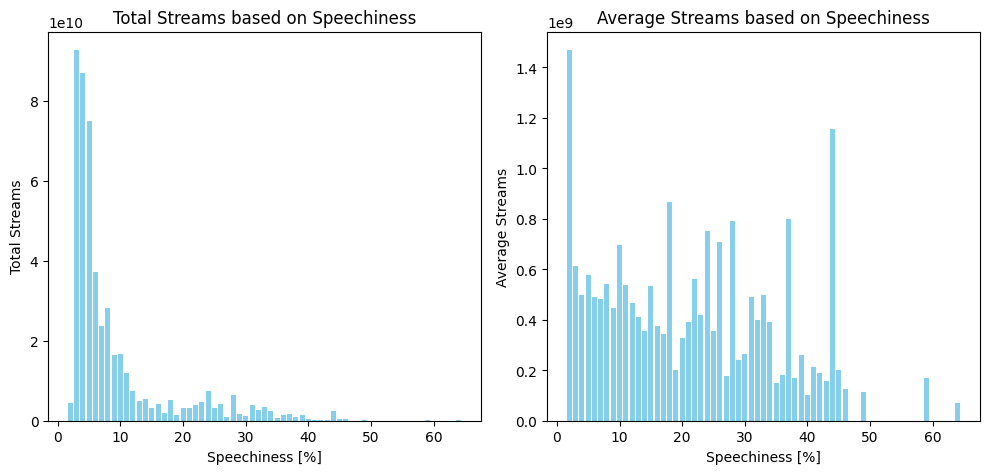

In [131]:
#Total streams based on speechiness
speechStreams = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='sum')
print('Total Streams')
display(speechStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on speechiness
speechStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='speechiness_%', aggfunc='mean')
print('Average Streams')
display(speechStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. speechiness
axs[0].bar(speechStreams.index, speechStreams['streams'], color='skyblue')
axs[0].set_xlabel('Speechiness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Speechiness')
#Average streams vs. speechiness
axs[1].bar(speechStreamAvg.index, speechStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Speechiness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Speechiness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### Key and Streams


Total Streams


,streams
key,
C#,7.251363e+10
G,4.344954e+10
G#,4.339898e+10
D,4.289157e+10
B,4.206718e+10


Average Streams


,streams
key,
C#,6.042802e+08
E,5.774972e+08
D#,5.530365e+08
A#,5.524754e+08
D,5.295256e+08


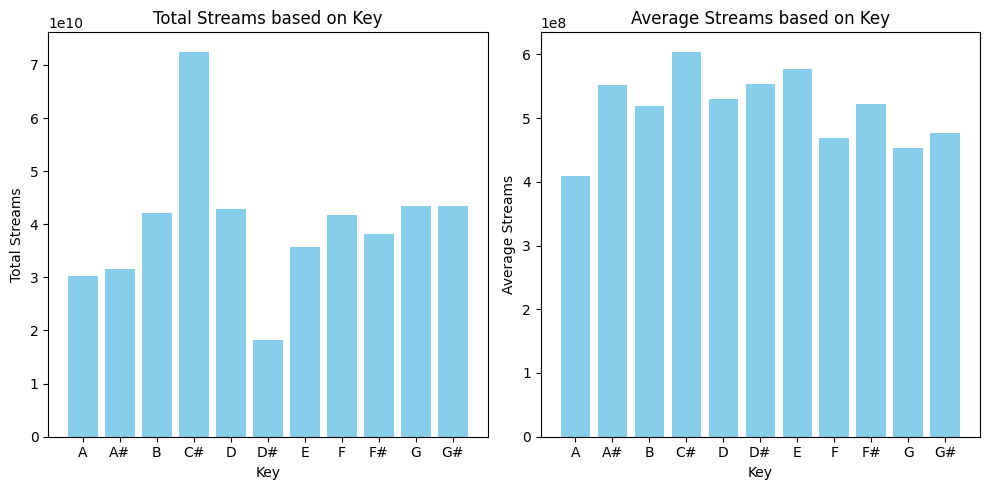

In [132]:

#Total streams based on Key
keyStreams = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='sum')
print('Total Streams')
display(keyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Key
keyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='key', aggfunc='mean')
print('Average Streams')
display(keyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Key
axs[0].bar(keyStreams.index, keyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Key')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Key')
#Average streams vs. Key
axs[1].bar(keyStreamAvg.index, keyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Key')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Key')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

#### Streams based on Valence

Total Streams


,streams
valence_%,
53,1.335094e+10
24,1.301216e+10
59,1.242249e+10
40,1.029115e+10
42,1.017591e+10


Average Streams


,streams
valence_%,
12,1.239393e+09
93,1.141778e+09
95,1.113839e+09
38,1.005746e+09
6,9.772233e+08


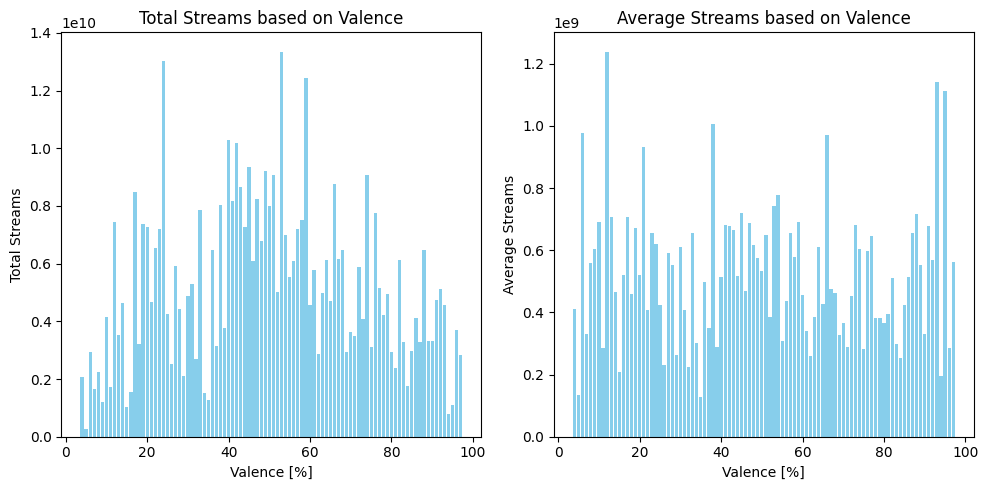

In [133]:

#Total streams based on Valence
valenceStreams = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='sum')
print('Total Streams')
display(valenceStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Valence
valenceStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='valence_%', aggfunc='mean')
print('Average Streams')
display(valenceStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Valence
axs[0].bar(valenceStreams.index, valenceStreams['streams'], color='skyblue')
axs[0].set_xlabel('Valence [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Valence')
#Average streams vs. Valence
axs[1].bar(valenceStreamAvg.index, valenceStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Valence [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Valence')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



#### Streams based on Energy

Total Streams


,streams
energy_%,
52,1.631815e+10
66,1.624626e+10
80,1.542621e+10
73,1.363552e+10
65,1.321418e+10


Average Streams


,streams
energy_%,
93,1.305763e+09
27,1.102825e+09
26,1.098487e+09
52,9.065641e+08
38,8.869762e+08


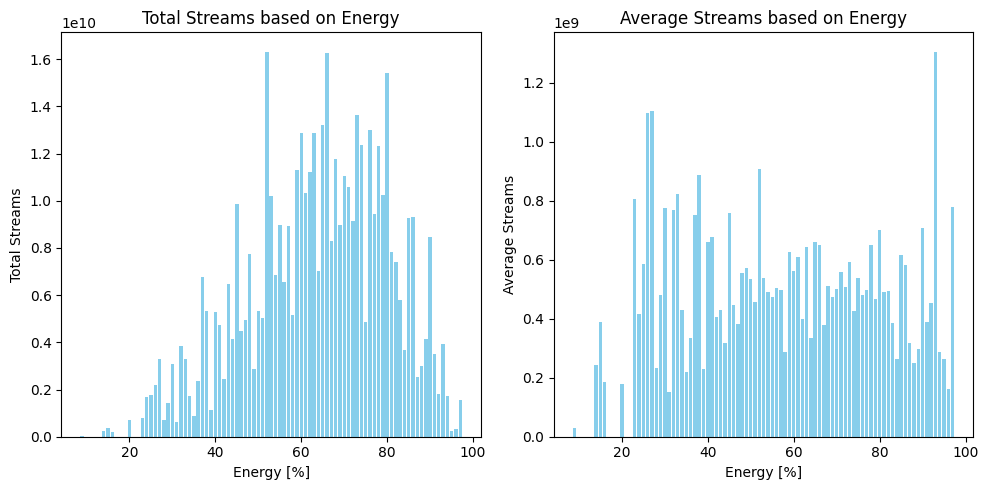

In [134]:

#Total streams based on Energy
energyStreams = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='sum')
print('Total Streams')
display(energyStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Energy
energyStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='energy_%', aggfunc='mean')
print('Average Streams')
display(energyStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Energy
axs[0].bar(energyStreams.index, energyStreams['streams'], color='skyblue')
axs[0].set_xlabel('Energy [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Energy')
#Average streams vs. Energy
axs[1].bar(energyStreamAvg.index, energyStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Energy [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Energy')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



#### Streams Based on Accousticness

Total Streams


,streams
acousticness_%,
0,3.525733e+10
1,3.004232e+10
4,2.208287e+10
2,2.119280e+10
9,1.924348e+10


Average Streams


,streams
acousticness_%,
58,1.662174e+09
63,1.521946e+09
54,1.431395e+09
93,1.240064e+09
68,1.230856e+09


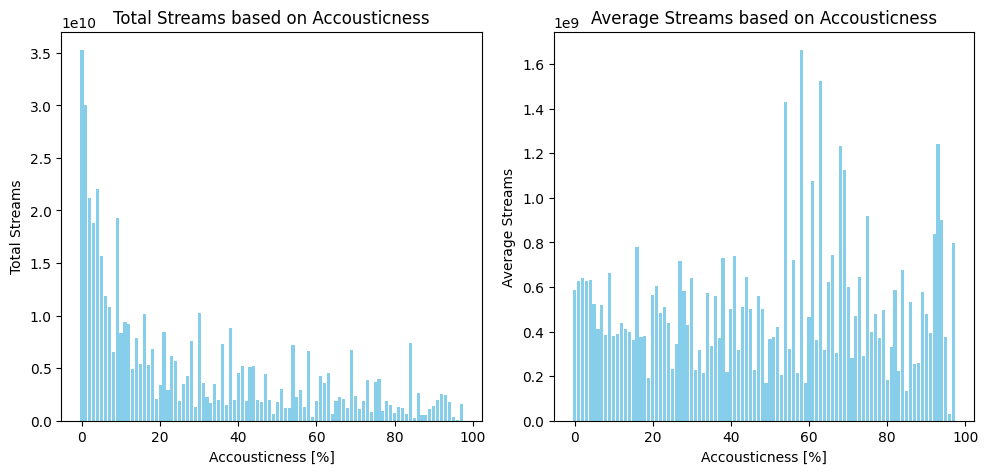

In [135]:

#Total streams based on Accousticness
accStreams = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='sum')
print('Total Streams')
display(accStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on Accousticness
accStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='acousticness_%', aggfunc='mean')
print('Average Streams')
display(accStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. Accousticness
axs[0].bar(accStreams.index, accStreams['streams'], color='skyblue')
axs[0].set_xlabel('Accousticness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Accousticness')
#Average streams vs. Accousticness
axs[1].bar(accStreamAvg.index, accStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Accousticness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Accousticness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()



#### Streams based on liveness

Total Streams


,streams
liveness_%,
9,5.752475e+10
11,4.736157e+10
10,4.472486e+10
12,2.988619e+10
8,2.791170e+10


Average Streams


,streams
liveness_%,
64,1.385757e+09
42,9.638291e+08
46,8.710787e+08
50,8.437020e+08
45,7.814507e+08


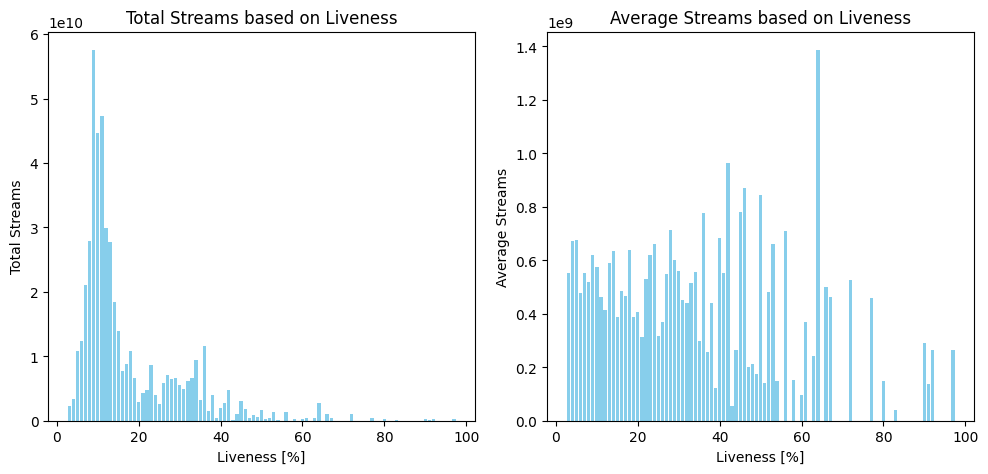

In [136]:

#Total streams based on liveness
livenessStreams = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='sum')
print('Total Streams')
display(livenessStreams.sort_values(by='streams', ascending=False).head())
#Average streams based on liveness
livenessStreamAvg = pd.pivot_table(spotifyDF, values='streams', index='liveness_%', aggfunc='mean')
print('Average Streams')
display(livenessStreamAvg.sort_values(by='streams', ascending=False).head())

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
#Total streams vs. liveness
axs[0].bar(livenessStreams.index, livenessStreams['streams'], color='skyblue')
axs[0].set_xlabel('Liveness [%]')
axs[0].set_ylabel('Total Streams')
axs[0].set_title('Total Streams based on Liveness')
#Average streams vs. liveness
axs[1].bar(livenessStreamAvg.index, livenessStreamAvg['streams'], color='skyblue')
axs[1].set_xlabel('Liveness [%]')
axs[1].set_ylabel('Average Streams')
axs[1].set_title('Average Streams based on Liveness')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# Dataset 1 Correlation and Analysis 

### Analysis of Data: Correlation
Need to first label encode the keys as well as standardize the data as there are different scales

In [221]:
label_encoder = LabelEncoder()
spotifyDF['key_encoded'] = label_encoder.fit_transform(spotifyDF['key'])
spotifyNumericDF = spotifyDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
spotifyNumericStandard = pd.DataFrame(scaler.fit_transform(spotifyNumericDF), columns=spotifyNumericDF.columns)
display(spotifyNumericStandard)

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,0.495653,-0.657242,0.086659,0.891442,1.602621,1.131712,0.150150,-0.188337,-0.743878,-0.619469,-1.063078
1,-0.623981,-0.670765,-1.089135,0.275883,0.409660,0.588086,-0.773080,-0.188337,-0.597987,-0.619469,-0.779332
2,-0.623981,-0.659672,0.549850,-1.092025,-0.825906,-0.680374,-0.388400,-0.188337,0.933875,-0.417752,0.355652
3,-0.623981,0.506203,1.690013,-0.818444,0.281843,0.467281,-0.619208,-0.188337,-0.525041,0.489975,-1.630570
4,-0.623981,-0.371691,0.763631,-0.134489,-1.209358,0.950503,-0.503804,7.299267,-0.525041,-0.417752,-1.630570
...,...,...,...,...,...,...,...,...,...,...,...
946,-0.623981,-0.745292,0.763631,-0.476466,-1.166752,-1.526014,1.150316,-0.188337,-0.743878,-0.720327,-1.630570
947,-0.623981,-0.691662,1.547493,-1.707584,-1.891050,-2.432056,2.150481,-0.069486,-0.452095,-0.417752,0.639398
948,0.495653,-0.776977,-1.089135,0.891442,1.261775,0.165266,-0.888483,-0.188337,-0.743878,-0.417752,-0.779332
949,1.615287,-0.670449,-0.910984,1.028233,0.665295,0.769295,-0.734612,-0.188337,-0.452095,-0.518610,-0.779332


With the data standardized, now want to look at correlation

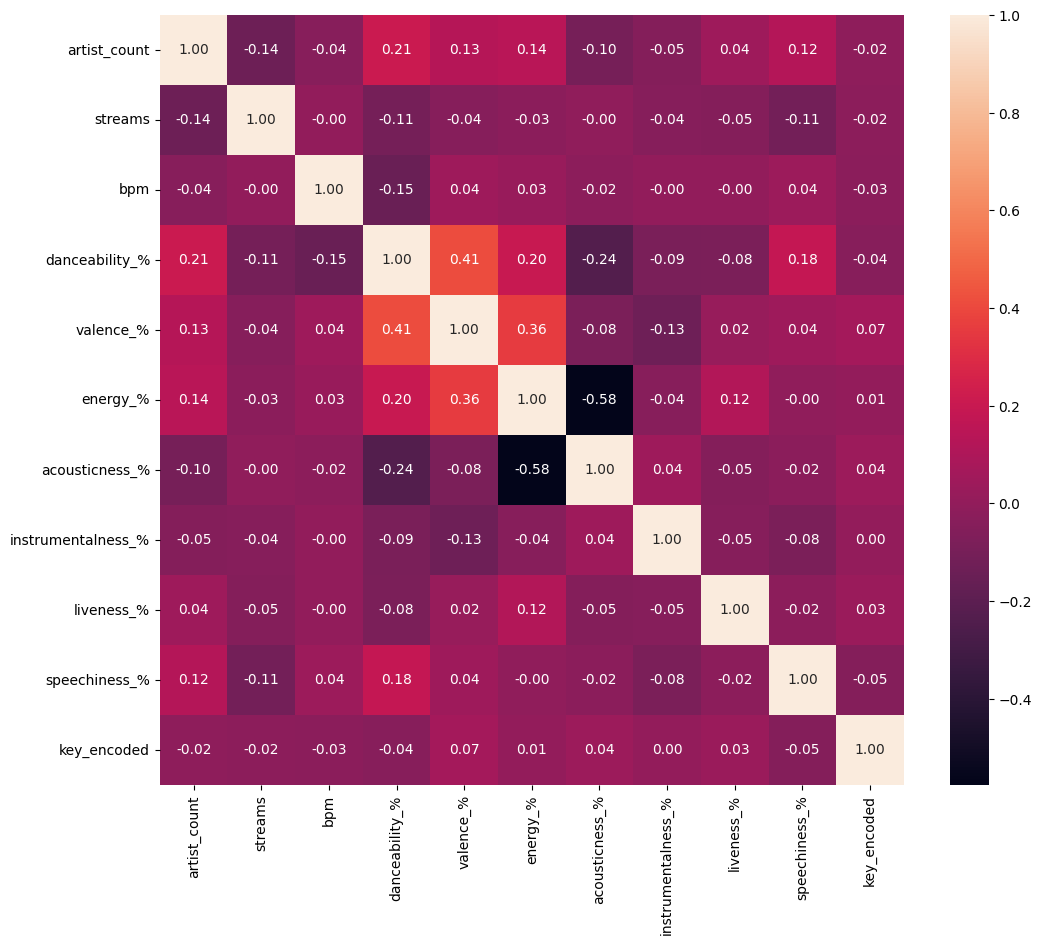

In [222]:
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(spotifyNumericStandard.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()


Does not look like there is any correlation with the number of streams and the aspects of songs. Lets look at lasso regression to pick the best values

### Analysis of Data: Lasso Regression and Decision Tree

In [223]:
#Train the model
X = spotifyNumericStandard.drop('streams', axis=1)
y = spotifyNumericStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
spotifyLassoRegDF = spotifyNumericStandard[negFeat + ['streams']]

# Print the new DataFrame
display(spotifyLassoRegDF)


Best alpha: 0.029521551656549322
Mean Squared Error: 0.749770051505896
              Feature  Coefficient
0        artist_count    -0.079182
1                 bpm    -0.000000
2      danceability_%    -0.034707
3           valence_%     0.000000
4            energy_%     0.000000
5      acousticness_%    -0.000000
6  instrumentalness_%    -0.026348
7          liveness_%    -0.045496
8       speechiness_%    -0.093412
9         key_encoded    -0.000000


,artist_count,danceability_%,instrumentalness_%,liveness_%,speechiness_%,streams
0,0.495653,0.891442,-0.188337,-0.743878,-0.619469,-0.657242
1,-0.623981,0.275883,-0.188337,-0.597987,-0.619469,-0.670765
2,-0.623981,-1.092025,-0.188337,0.933875,-0.417752,-0.659672
3,-0.623981,-0.818444,-0.188337,-0.525041,0.489975,0.506203
4,-0.623981,-0.134489,7.299267,-0.525041,-0.417752,-0.371691
...,...,...,...,...,...,...
946,-0.623981,-0.476466,-0.188337,-0.743878,-0.720327,-0.745292
947,-0.623981,-1.707584,-0.069486,-0.452095,-0.417752,-0.691662
948,0.495653,0.891442,-0.188337,-0.743878,-0.417752,-0.776977
949,1.615287,1.028233,-0.188337,-0.452095,-0.518610,-0.670449


Now that we have found the best coefficients, lets run different models with those coefficients

In [224]:

# Extract features (X) and target values (y) from the dataframe
X =  spotifyLassoRegDF.drop('streams', axis=1)
y = spotifyLassoRegDF['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)


Linear Regression Mean Squared Error: 0.7527008209059232


Random Forrest Mean Squared Error: 0.8711429926645522
Tree Regression Mean Squared Error: 1.2714211087329463


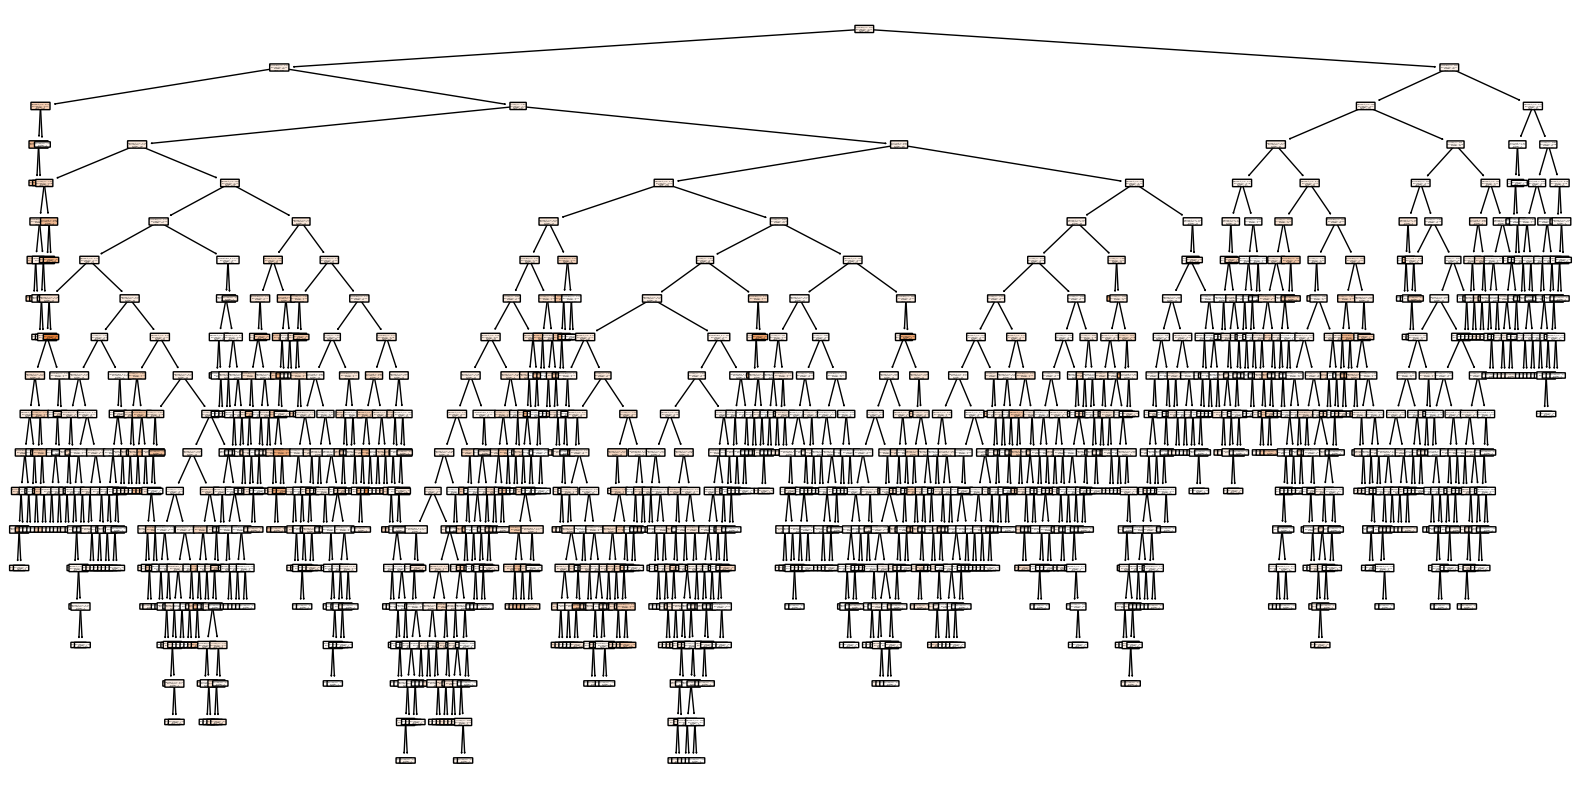

In [225]:
# Visualize the decision tree just for fun
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()


# Conclusions from Dataset 1 Exploration and Analysis

Our analysis showed that there was no correlation between individual song features and streams. This is the same conclusion that both Stanford and Carleton University researchers came to. We decided to find another dataset with genre information for songs, and to see if we could find any correlation between songs of specific genres and what muscial features make those songs successful.

# Dataset 2 - Spotify Tracks Dataset
- Spotify Tracks Dataset: This dataset is made up of spotify tracks ranging over 125 different genres. (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [192]:
# Reading in Dataset 2
spotifyLargeDF = pd.read_csv('spotify_large.csv', encoding='latin-1')
# Display the first few rows of the DataFrame
display(spotifyLargeDF.head(5))

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [193]:
#describe the dataframe
spotifyLargeDF.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [194]:
#look at types
spotifyLargeDF.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [195]:
#Find all null values
spotifyLargeDF.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [196]:
#Duplication
spotifyLargeDF.duplicated().sum()

0

# Combining Datasets 1 and 2

We combined both datasets on songs that were shared between the two.

In [197]:
#adjust data frames to match
spotifyDF.rename(columns={'artist(s)_name': 'artists'}, inplace=True)
spotifyLargeDF.rename(columns={'key': 'large_key'}, inplace=True)
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].str.replace(';', ', ')
spotifyDF['artists'] = spotifyDF['artists'].astype(str)
spotifyLargeDF['artists'] = spotifyLargeDF['artists'].astype(str)
#Make sure there are no duplicates
print(spotifyDF.duplicated().sum())
print(spotifyLargeDF.duplicated().sum())

0
0


In [150]:
spotifyLargeDF.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
large_key           0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [198]:
spotifyCombined = pd.merge(spotifyDF, spotifyLargeDF[['artists', 'track_name','track_genre', 'popularity', 'large_key']], on=['artists','track_name'])

In [199]:
display(spotifyCombined)


,track_name,artists,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,track_genre,popularity,large_key
0,As It Was,Harry Styles,1,2513188493,174,F#,Minor,52,66,73,34,0,31,6,8,pop,95,6
1,As It Was,Harry Styles,1,2513188493,174,F#,Minor,52,66,73,34,0,31,6,8,pop,92,6
2,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11,garage,92,0
3,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11,indie,92,0
4,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11,rock,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,2 Be Loved (Am I Ready),Lizzo,1,247689123,156,G,Major,72,92,77,9,0,8,11,9,hip-hop,0,7
1221,2 Be Loved (Am I Ready),Lizzo,1,247689123,156,G,Major,72,92,77,9,0,8,11,9,hip-hop,0,7
1222,Typa Girl,BLACKPINK,1,235549288,132,G,Major,92,53,62,7,0,63,10,9,k-pop,82,7
1223,Typa Girl,BLACKPINK,1,235549288,132,G,Major,92,53,62,7,0,63,10,9,k-pop,61,7


In [200]:
#calculate duplicates
print(spotifyCombined.duplicated().sum())
spotifyCombined[spotifyCombined.duplicated(subset=['artists', 'track_name'])]


416


,track_name,artists,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,track_genre,popularity,large_key
1,As It Was,Harry Styles,1,2513188493,174,F#,Minor,52,66,73,34,0,31,6,8,pop,92,6
3,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11,indie,92,0
4,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,NaN,Minor,48,44,42,12,2,11,3,11,rock,92,0
7,I Ain't Worried,OneRepublic,1,1085685420,140,NaN,Major,71,82,81,11,0,6,5,11,piano,0,0
8,I Ain't Worried,OneRepublic,1,1085685420,140,NaN,Major,71,82,81,11,0,6,5,11,piano,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2 Be Loved (Am I Ready),Lizzo,1,247689123,156,G,Major,72,92,77,9,0,8,11,9,hip-hop,4,7
1220,2 Be Loved (Am I Ready),Lizzo,1,247689123,156,G,Major,72,92,77,9,0,8,11,9,hip-hop,0,7
1221,2 Be Loved (Am I Ready),Lizzo,1,247689123,156,G,Major,72,92,77,9,0,8,11,9,hip-hop,0,7
1223,Typa Girl,BLACKPINK,1,235549288,132,G,Major,92,53,62,7,0,63,10,9,k-pop,61,7


In [201]:
#remove duplicates
spotifyCombined = spotifyCombined.drop_duplicates(subset=['artists', 'track_name'])
spotifyCombined.duplicated().sum()

0

In [155]:
spotifyCombined.isnull().sum()

track_name               0
artists                  0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        31
bpm                      0
key                     31
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
key_encoded              0
track_genre              0
popularity               0
large_key                0
dtype: int64

## Feature Engineering on Key

In [203]:
#Create function to replace all keys
keyNull = spotifyCombined['key'].isnull()
spotifyCombined.loc[keyNull, 'key'] = spotifyCombined.loc[keyNull, 'large_key']

keyDict = {
    0: 'C',
    1: 'C#',
    2: 'D',
    3: 'D#',
    4: 'E',
    5: 'F',
    6: 'F#',
    7: 'G',
    8: 'G#',
    9: 'A',
    10: 'A#',
    11: 'B'
}

#replace all values of integers to strings in key column
spotifyCombined['key'] = spotifyCombined['key'].replace(keyDict)
spotifyCombined.drop('large_key', axis=1, inplace=True)

spotifyCombined.isnull().sum()

track_name            0
artists               0
artist_count          0
streams               0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
key_encoded           0
track_genre           0
popularity            0
dtype: int64

In [204]:
label_encoder = LabelEncoder()
spotifyCombined['Encoded_key'] = label_encoder.fit_transform(spotifyCombined['key'])
display(spotifyCombined)

,track_name,artists,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,track_genre,popularity,Encoded_key
0,As It Was,Harry Styles,1,2513188493,174,F#,Minor,52,66,73,34,0,31,6,8,pop,95,9
2,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,C,Minor,48,44,42,12,2,11,3,11,garage,92,3
5,Blank Space,Taylor Swift,1,1355959075,96,F,Major,75,57,68,9,0,13,6,7,pop,85,8
6,I Ain't Worried,OneRepublic,1,1085685420,140,C,Major,71,82,81,11,0,6,5,11,piano,96,3
20,Die For You,The Weeknd,1,1647990401,134,C#,Minor,59,51,52,9,0,15,7,3,pop,88,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,The Scientist,Coldplay,1,1608164312,146,F,Major,56,21,44,73,0,11,2,7,pop,2,8
1203,Bye Bye,"Marshmello, Juice WRLD",2,84697729,83,D#,Minor,65,24,53,6,0,51,4,5,dance,83,6
1207,we fell in love in october,girl in red,1,723043854,130,G,Major,57,24,37,11,18,16,3,9,indie-pop,80,10
1209,2 Be Loved (Am I Ready),Lizzo,1,247689123,156,G,Major,72,92,77,9,0,8,11,9,hip-hop,3,10


In [205]:
print(spotifyCombined['track_genre'].value_counts())

track_genre
pop                  46
dance                39
hip-hop              27
k-pop                21
latin                14
latino               14
indie-pop            13
rock                  6
electro               5
alt-rock              5
piano                 5
garage                5
british               5
singer-songwriter     4
funk                  4
indie                 3
soul                  3
folk                  3
hard-rock             3
anime                 3
synth-pop             2
german                2
country               2
alternative           2
emo                   2
reggae                2
rock-n-roll           1
edm                   1
j-rock                1
grunge                1
blues                 1
indian                1
jazz                  1
rockabilly            1
disco                 1
ambient               1
chill                 1
french                1
r-n-b                 1
Name: count, dtype: int64


# Visualizing Combined Data

#### Artist Streams

In [206]:
#artist streams
artistStreams = pd.pivot_table(spotifyCombined, values='streams', index='artists', aggfunc='sum')
display(artistStreams.sort_values(by='streams',ascending=False).sample(15))

,streams
artists,
"Kendrick Lamar, Blxst, Amanda Reifer",237351106
Kenshi Yonezu,210038833
The Goo Goo Dolls,1284942608
Nirvana,1690192927
Troye Sivan,408843328
James Arthur,2420461338
BLACKPINK,1269030423
Lewis Capaldi,2887241814
Charlie Puth,646703472


In [207]:
##Splitting streams up on songs with multiple artists
artist_split = spotifyCombined.assign(artist=spotifyCombined['artists'].str.split(',')).explode('artists')
artist_split = artist_split[['artist', 'streams']]
artist_split = artist_split.explode('artist')
artist_split.sample(15)

,artist,streams
865,AnnenMayKantereit,236872197
322,Lizzo,723894473
589,Olivia Rodrigo,1887039593
247,Sia,939844851
114,Harry Styles,2322580122
824,XXXTENTACION,1200808494
1145,Britney Spears,284216603
865,Giant Rooks,236872197
654,David Kushner,124407432
579,Jaymes Young,888046992


In [208]:
'''Calculating an Artist's Number of Streams per Song in the Dataset'''
avg_streams_per_artist = artist_split.groupby('artist')['streams'].mean()
avg_streams_per_artist = pd.DataFrame(avg_streams_per_artist).sort_values('streams', ascending=False)
avg_streams_per_artist

,streams
artist,
Lewis Capaldi,2.887242e+09
Halsey,2.591224e+09
Daft Punk,2.565530e+09
Glass Animals,2.557976e+09
James Arthur,2.420461e+09
...,...
Nessa Barrett,1.317462e+08
David Kushner,1.244074e+08
Halsey,9.178126e+07


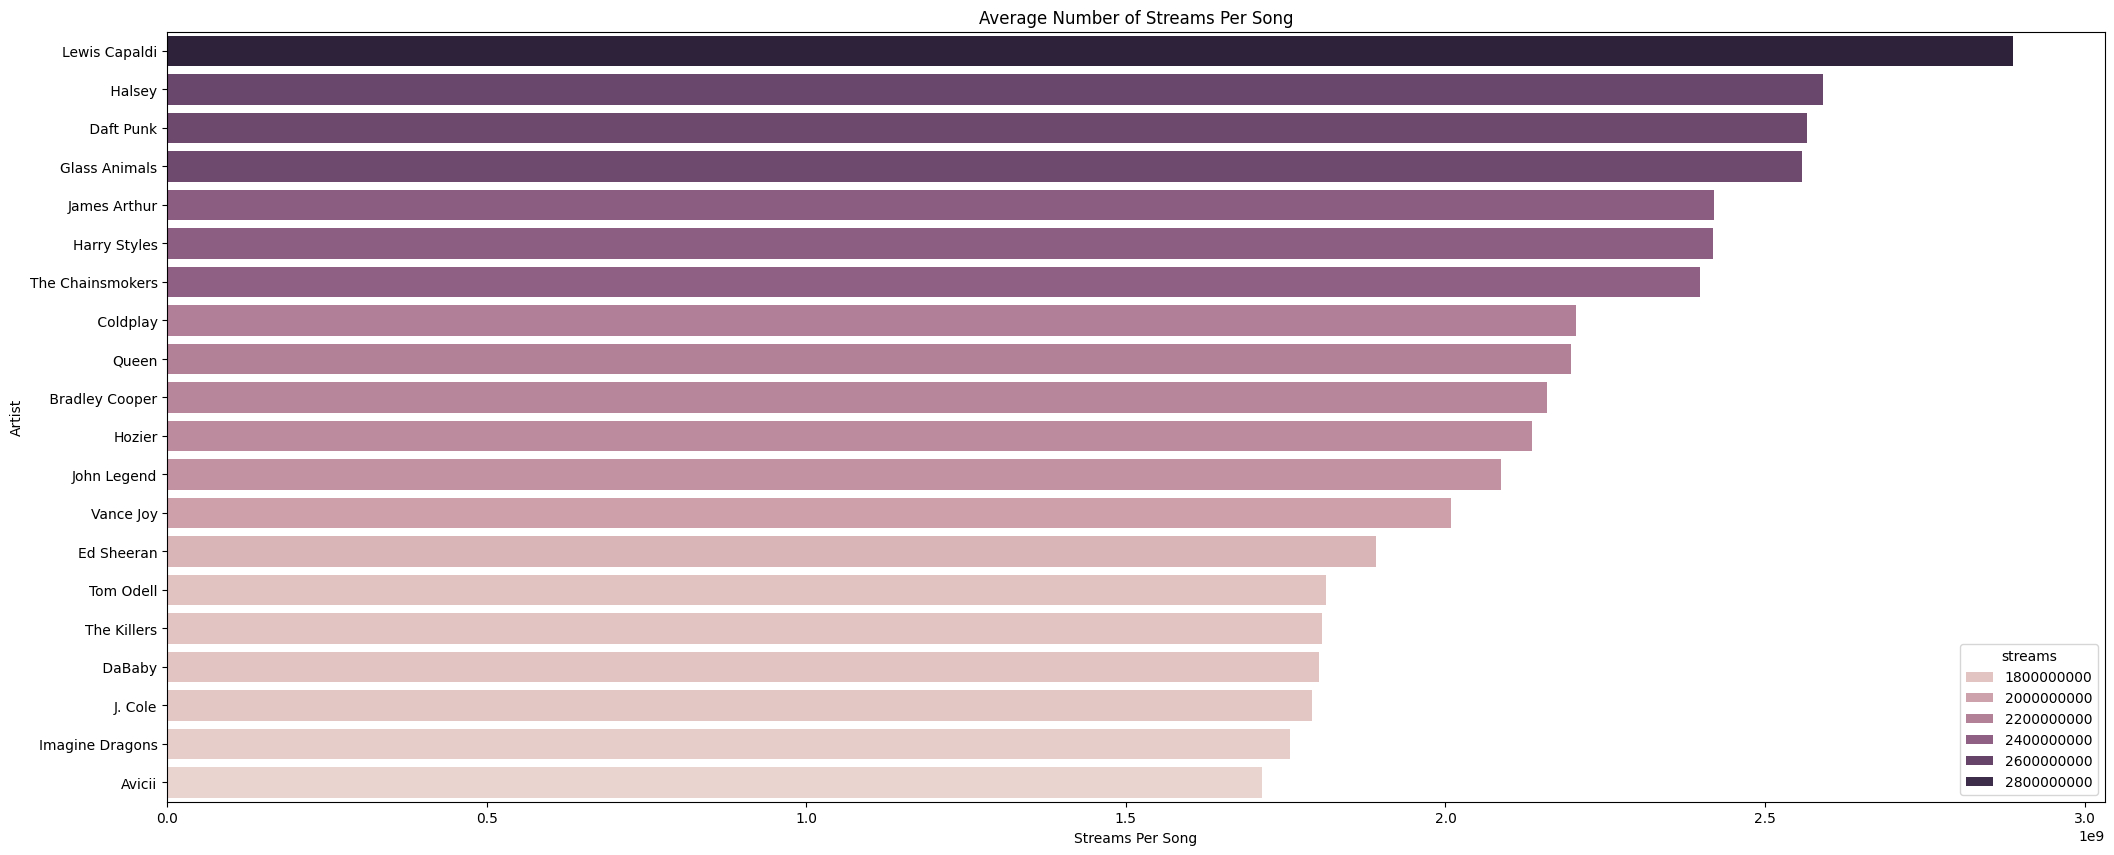

In [209]:
top_20_streams = avg_streams_per_artist.head(20)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=top_20_streams, x='streams', y='artist', hue='streams', orient='h')
plt.ylabel('Artist')
plt.xlabel('Streams Per Song')
plt.title('Average Number of Streams Per Song')
plt.show()

#### Genre Streams

In [210]:
genre_streams = spotifyCombined.groupby('track_genre')['streams'].sum()
genre_streams = pd.DataFrame(genre_streams).sort_values('streams', ascending=False)
genre_streams.head()

,streams
track_genre,
pop,66953492491
dance,38117856266
hip-hop,21479303562
rock,9234944972
latin,9077793651


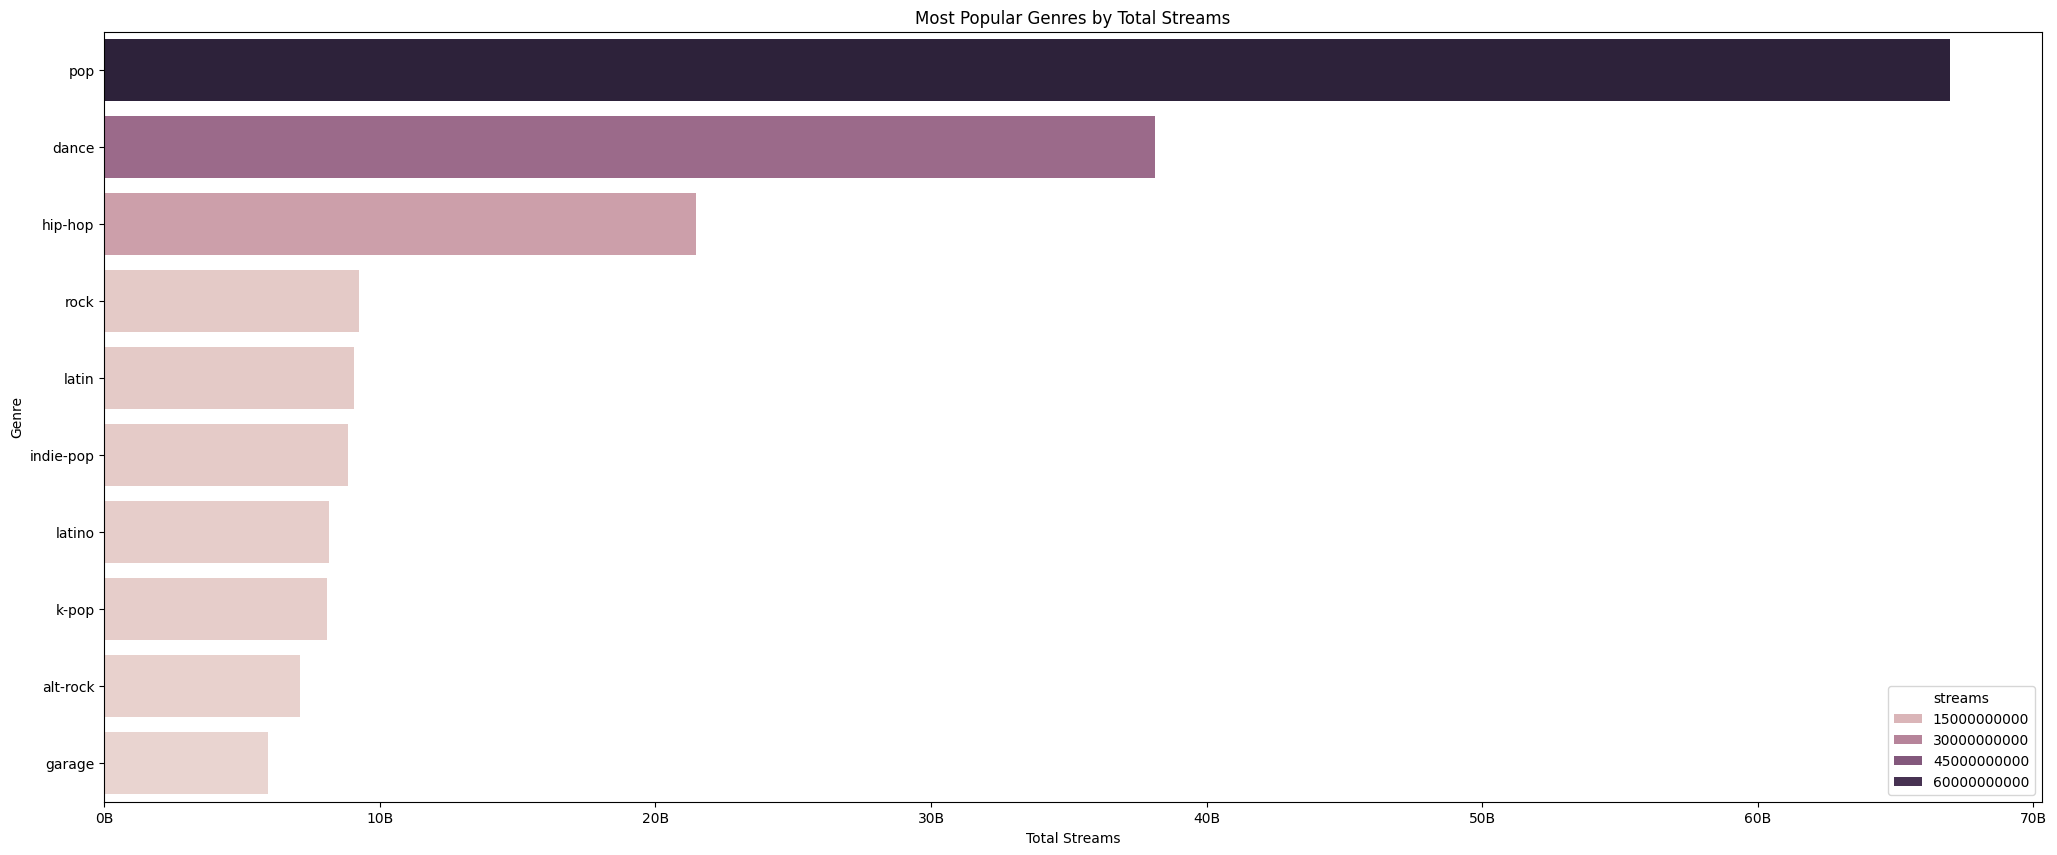

In [211]:
#formatter for visualization
def billions_formatter(x, pos):
  return f"{x / 1e9:,.0f}B"

fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=genre_streams.head(10), y='track_genre', x='streams', hue='streams', orient='h')
plt.xlabel('Total Streams')
plt.ylabel('Genre')
plt.title('Most Popular Genres by Total Streams')
plt.gca().xaxis.set_major_formatter(billions_formatter)
plt.show()

#### Relationship Between Popularity and Streams

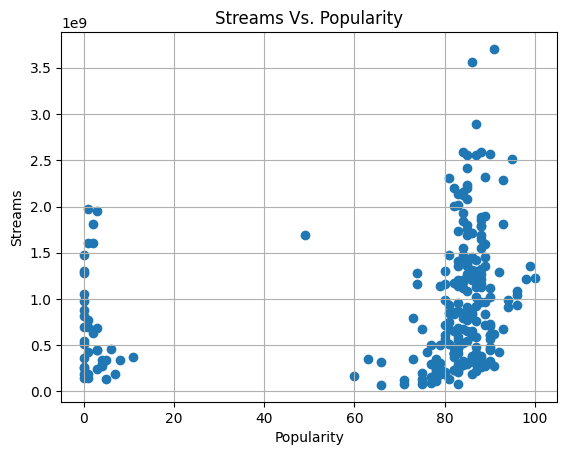

In [212]:
# Plotting
plt.scatter(spotifyCombined['popularity'], spotifyCombined['streams'], marker='o')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.title('Streams Vs. Popularity')

# Display the plot
plt.grid(True)
plt.show()

(213, 18)


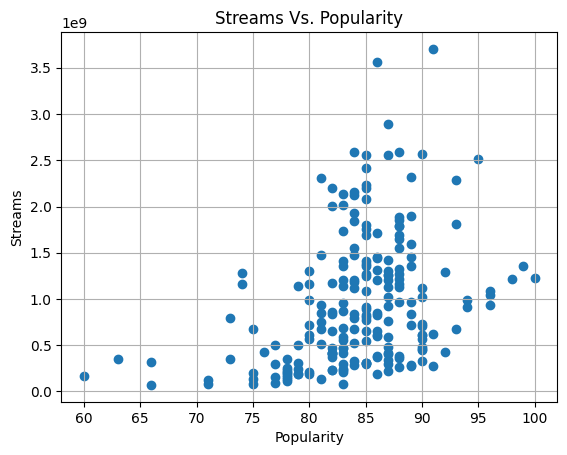

In [213]:
# Plotting
popularDF = spotifyCombined[spotifyCombined['popularity'] > 50]
print(popularDF.shape)
plt.scatter(popularDF['popularity'], popularDF['streams'], marker='o')

# Adding labels and title
plt.xlabel('Popularity')
plt.ylabel('Streams')
plt.title('Streams Vs. Popularity')

# Display the plot
plt.grid(True)
plt.show()

In [214]:
corrCoef = np.corrcoef(popularDF['popularity'], popularDF['streams'])[0, 1]
print(corrCoef)

0.3558464953631706


# Combined Analysis

#### Check non-linear

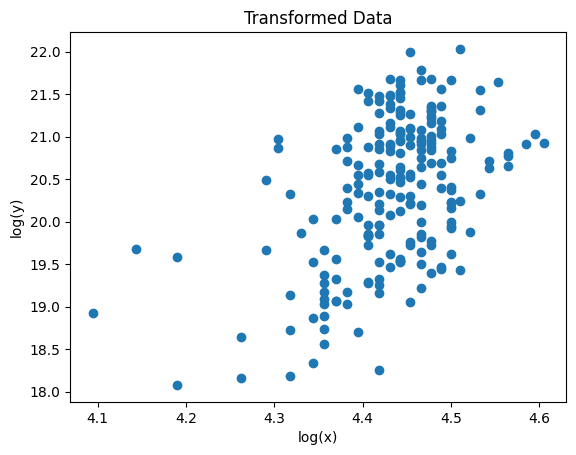

Correlation Coefficient: 0.47446100057171664
Curve Fitting Parameters: [-6.27816399e-21  9.99999993e-01]


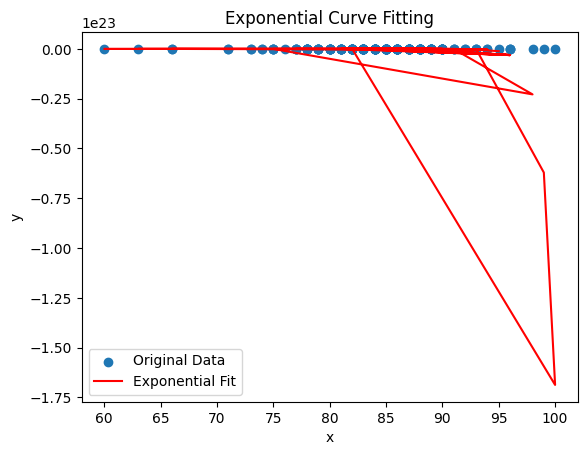

In [215]:
x = spotifyCombined.loc[spotifyCombined['popularity'] > 50, 'popularity']
y = spotifyCombined.loc[spotifyCombined['popularity'] > 50, 'streams']
# 2. Transform the Data
x_log = np.log(x)
y_log = np.log(y)
plt.scatter(x_log, y_log)
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Transformed Data')
plt.show()

# 3. Correlation Analysis
correlation_coefficient, _ = pearsonr(x_log, y_log)
print("Correlation Coefficient:", correlation_coefficient)

# 4. Curve Fitting
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponential_func, x, y)
print("Curve Fitting Parameters:", params)

# Plot the curve fitting
plt.scatter(x, y, label='Original Data')
plt.plot(x, exponential_func(x, *params), color='red', label='Exponential Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exponential Curve Fitting')
plt.legend()
plt.show()

Better, but still not great. Lets run analysis per genre

## Analysis per Genre

In [216]:
#Drop key and popularity
spotifyCombined = spotifyCombined.drop(['key', 'popularity'], axis=1)
spotifyCombined.head(3)

,track_name,artists,artist_count,streams,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,track_genre,Encoded_key
0,As It Was,Harry Styles,1,2513188493,174,Minor,52,66,73,34,0,31,6,8,pop,9
2,I Wanna Be Yours,Arctic Monkeys,1,1297026226,135,Minor,48,44,42,12,2,11,3,11,garage,3
5,Blank Space,Taylor Swift,1,1355959075,96,Major,75,57,68,9,0,13,6,7,pop,8


Similarly from before, lets standardize the data

In [220]:
spotifyCombinedNumericDF = spotifyCombined.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
spotifyCombinedStandard = pd.DataFrame(scaler.fit_transform(spotifyCombinedNumericDF), columns=spotifyCombinedNumericDF.columns)
display(spotifyCombinedStandard)

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded,Encoded_key
0,-0.406223,2.296281,1.777979,-0.847535,0.743558,0.521659,0.382610,-0.190961,1.028333,-0.352098,0.639165,1.058738
1,-0.406223,0.539031,0.447529,-1.107131,-0.253706,-1.379536,-0.454829,0.039651,-0.538474,-0.719189,1.472716,-0.688180
2,-0.406223,0.624183,-0.882922,0.645143,0.335587,0.215015,-0.569025,-0.190961,-0.381793,-0.352098,0.361315,0.767585
3,-0.406223,0.233661,0.618099,0.385546,1.468841,1.012290,-0.492894,-0.190961,-0.930175,-0.474462,1.472716,-0.688180
4,-0.406223,1.046144,0.413414,-0.393242,0.063606,-0.766247,-0.569025,-0.190961,-0.225112,-0.229734,-0.750086,-0.397027
...,...,...,...,...,...,...,...,...,...,...,...,...
248,-0.406223,0.988599,0.822784,-0.587939,-1.296300,-1.256878,1.867160,-0.190961,-0.538474,-0.841553,0.361315,0.767585
249,1.691214,-1.212681,-1.326405,-0.003848,-1.160309,-0.704918,-0.683221,-0.190961,2.595140,-0.596826,-0.194385,0.185279
250,-0.406223,-0.290325,0.276958,-0.523040,-1.160309,-1.686180,-0.492894,1.884544,-0.146772,-0.719189,0.917016,1.349891
251,-0.406223,-0.977172,1.163925,0.450446,1.922143,0.766974,-0.569025,-0.190961,-0.773495,0.259721,0.917016,1.349891


Lets Look at correlation again to see if Genre has an effect

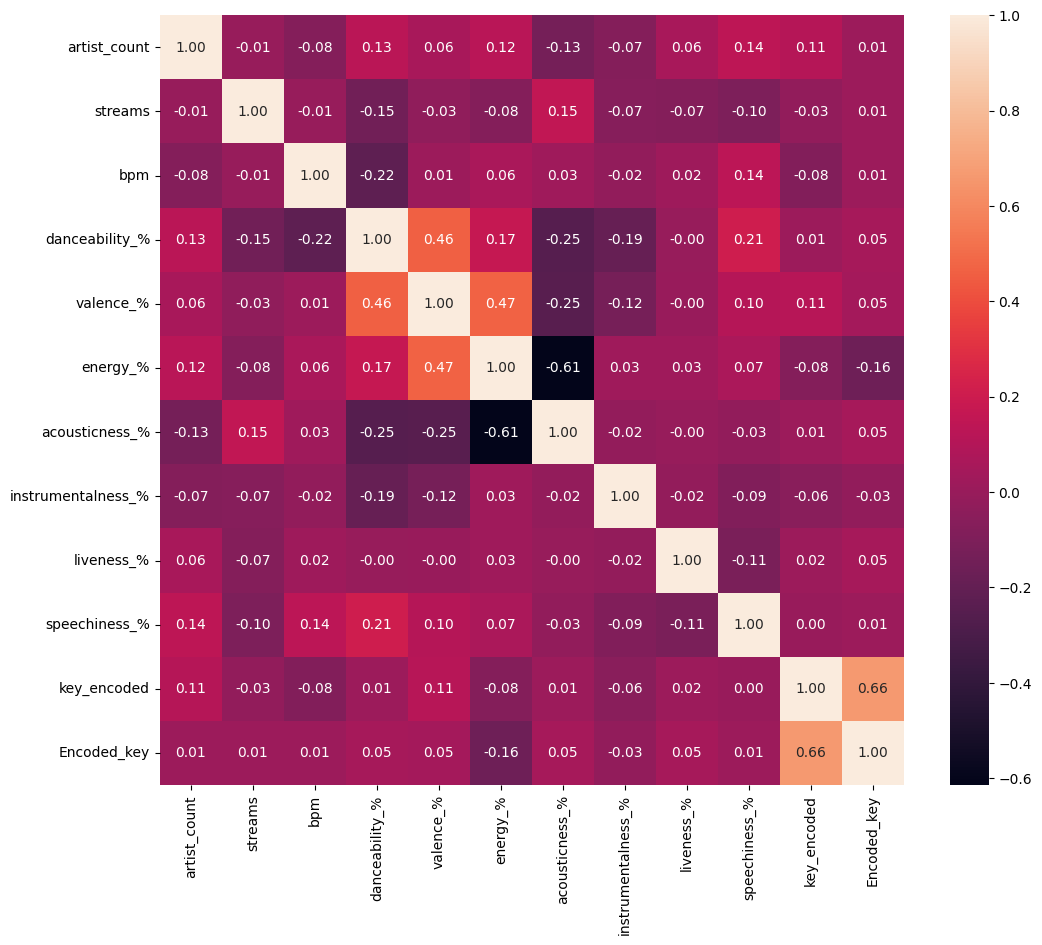

In [218]:
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(spotifyNumericStandard.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

## Individual Genre Analysis

### Pop Genre

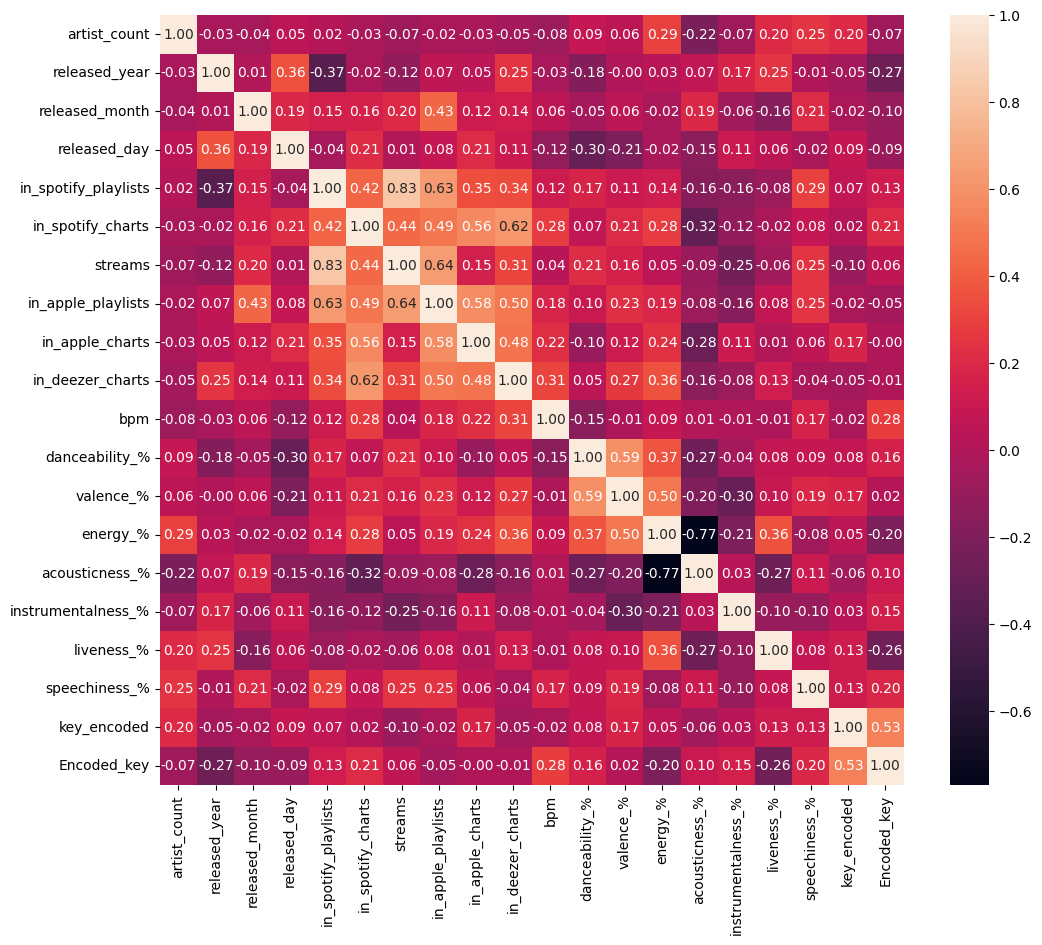

In [173]:
#Create df based only on pop genre
popDF = spotifyCombined[spotifyCombined['track_genre'].isin(['pop'])]
popDF = popDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
popStandard = pd.DataFrame(scaler.fit_transform(popDF), columns=popDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(popDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

There seems to be more correlation with the streams here. Lets run a lasso regression to get the best predictors

In [175]:
#Train the model
X = popStandard.drop('streams', axis=1)
y = popStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
popLasso = popStandard[negFeat + ['streams']]

Best alpha: 0.03489114086228016
Mean Squared Error: 0.36808834531225476
                 Feature  Coefficient
0           artist_count    -0.000000
1          released_year     0.123240
2         released_month     0.001146
3           released_day     0.101438
4   in_spotify_playlists     0.730378
5      in_spotify_charts     0.119443
6     in_apple_playlists     0.278061
7        in_apple_charts    -0.197599
8       in_deezer_charts    -0.045229
9                    bpm    -0.005660
10        danceability_%     0.000000
11             valence_%     0.091772
12              energy_%    -0.069669
13        acousticness_%     0.000000
14    instrumentalness_%    -0.000000
15            liveness_%    -0.000000
16         speechiness_%    -0.000000
17           key_encoded    -0.169321
18           Encoded_key    -0.000000


Looks like pop has no real predictors

### Dance Genre

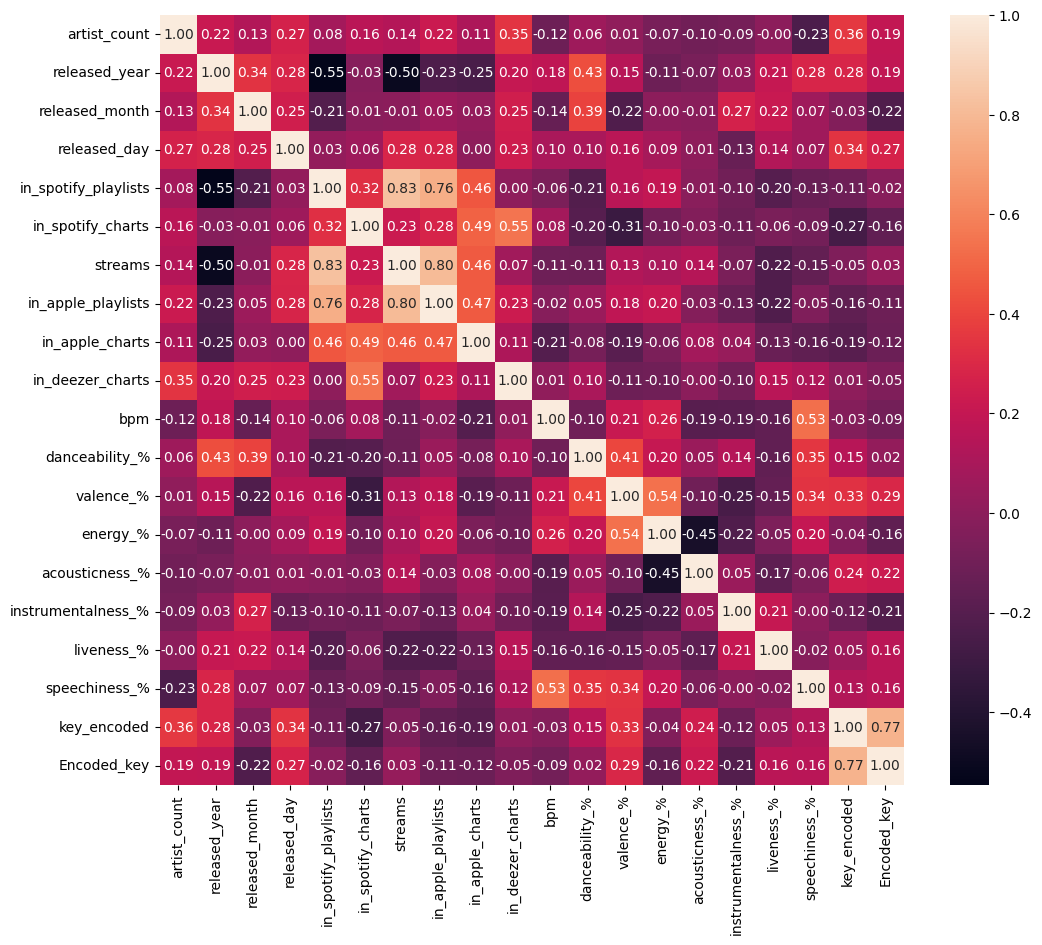

In [177]:
#Create df based only on pop genre
danceDF = spotifyCombined[spotifyCombined['track_genre'].isin(['dance'])]
danceDF = danceDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
danceStandard = pd.DataFrame(scaler.fit_transform(danceDF), columns=danceDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(danceDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [178]:
#Train the model
X = danceStandard.drop('streams', axis=1)
y = danceStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
danceLasso = danceStandard[negFeat + ['streams']]

Best alpha: 0.08174132221734598
Mean Squared Error: 0.8483938125117121
                 Feature  Coefficient
0           artist_count     0.000000
1          released_year    -0.039819
2         released_month     0.040490
3           released_day     0.090672
4   in_spotify_playlists     0.940892
5      in_spotify_charts     0.000000
6     in_apple_playlists     0.031537
7        in_apple_charts     0.000235
8       in_deezer_charts     0.000000
9                    bpm    -0.000000
10        danceability_%    -0.000000
11             valence_%    -0.000000
12              energy_%    -0.000000
13        acousticness_%     0.000000
14    instrumentalness_%     0.000000
15            liveness_%    -0.000000
16         speechiness_%    -0.000000
17           key_encoded     0.000000
18           Encoded_key     0.000000


### Hip Hop

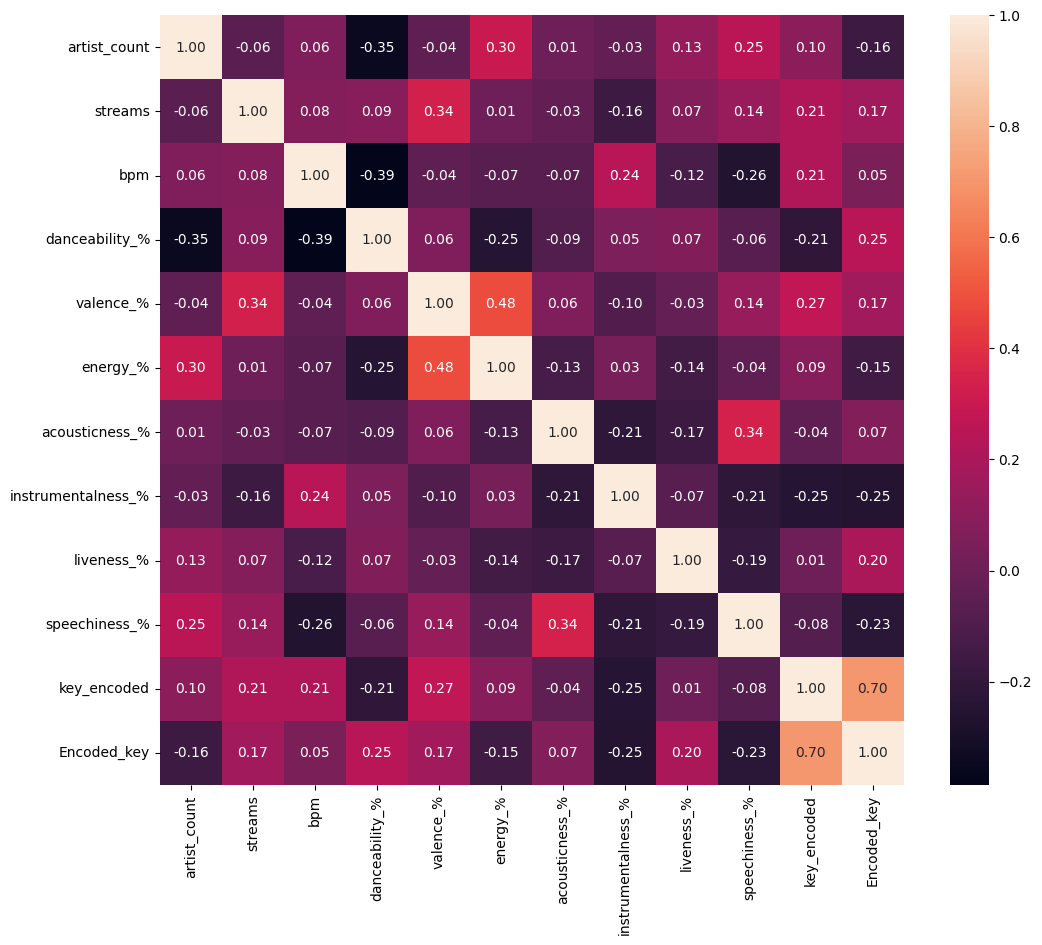

In [227]:
#Create df based only on pop genre
hhDF = spotifyCombined[spotifyCombined['track_genre'].isin(['hip-hop'])]
hhDF = hhDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
hhStandard = pd.DataFrame(scaler.fit_transform(hhDF), columns=hhDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(hhDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [228]:
#Train the model
X = hhStandard.drop('streams', axis=1)
y = hhStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
hhLasso = hhStandard[negFeat + ['streams']]

Best alpha: 0.3396998761752111
Mean Squared Error: 0.642470033764113
               Feature  Coefficient
0         artist_count         -0.0
1                  bpm          0.0
2       danceability_%          0.0
3            valence_%          0.0
4             energy_%         -0.0
5       acousticness_%          0.0
6   instrumentalness_%         -0.0
7           liveness_%          0.0
8        speechiness_%          0.0
9          key_encoded          0.0
10         Encoded_key          0.0


### K-Pop

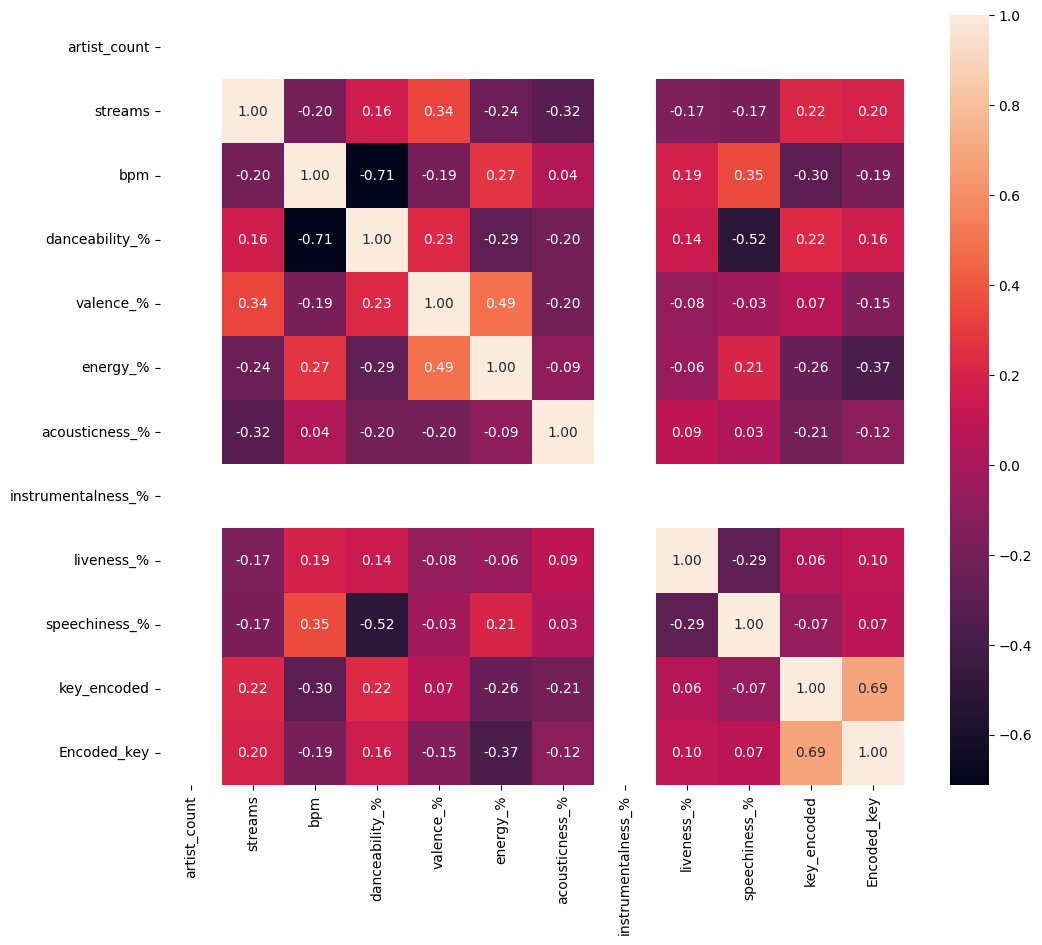

In [229]:
#Create df based only on pop genre
kpopDF = spotifyCombined[spotifyCombined['track_genre'].isin(['k-pop'])]
kpopDF = kpopDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
kpopStandard = pd.DataFrame(scaler.fit_transform(kpopDF), columns=kpopDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(kpopDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [230]:
#Train the model
X = kpopStandard.drop('streams', axis=1)
y = kpopStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0.1]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
kpopLasso = kpopStandard[negFeat + ['streams']]

Best alpha: 0.09377895220232468
Mean Squared Error: 0.9653418747897415
               Feature  Coefficient
0         artist_count     0.000000
1                  bpm    -0.000000
2       danceability_%     0.000000
3            valence_%     0.603031
4             energy_%    -0.346632
5       acousticness_%    -0.526961
6   instrumentalness_%     0.000000
7           liveness_%    -0.051317
8        speechiness_%    -0.000000
9          key_encoded     0.000000
10         Encoded_key     0.014165


Looks like we were able to get some influential coefficients, let's build on this

In [231]:
# Extract features (X) and target values (y) from the dataframe
X =  kpopLasso.drop('streams', axis=1)
y = kpopLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 5.101928880801684
Random Forrest Mean Squared Error: 0.09677554786046291
Tree Regression Mean Squared Error: 0.30839083620727376


Random Forrest was very good here. Let's extract the data

In [232]:
# Extract feature importance scores
feature_importance = rf_regressor.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(kpopLasso.columns, feature_importance))

# Sort the dictionary by importance score in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top N most important features
top_n = len(rf_regressor.feature_importances_)  # Number of top features to display
print(f"Top {top_n} most important features:")
for i in range(top_n):
    feature_name, importance_score = sorted_feature_importance[i]
    print(f"{feature_name}: Importance Score = {importance_score:.4f}")

Top 3 most important features:
acousticness_%: Importance Score = 0.3671
energy_%: Importance Score = 0.3300
valence_%: Importance Score = 0.3029


### Latin

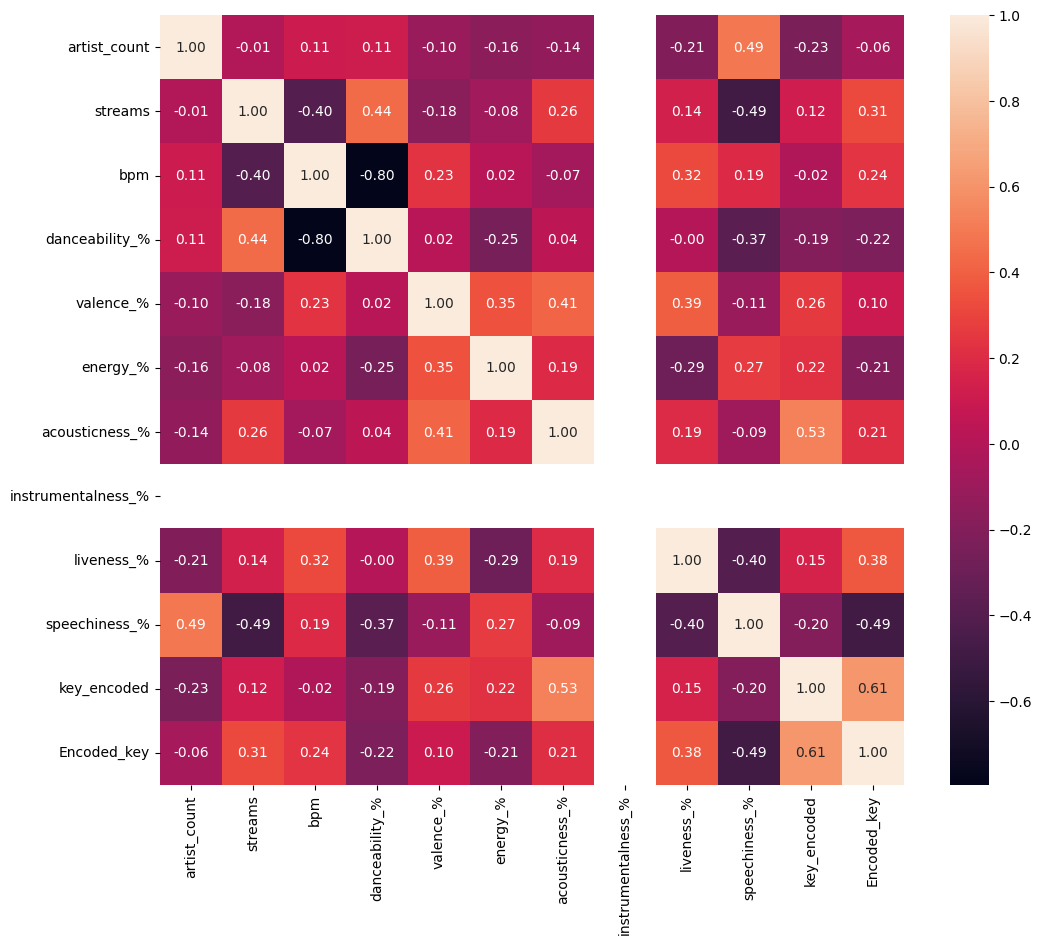

In [233]:
#Create df based only on Latin genre
latinDF = spotifyCombined[spotifyCombined['track_genre'].isin(['latin'])]
latinDF = latinDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
latinStandard = pd.DataFrame(scaler.fit_transform(latinDF), columns=latinDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(latinDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [234]:
#Train the model
X = latinStandard.drop('streams', axis=1)
y = latinStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
latinLasso = latinStandard[negFeat + ['streams']]

Best alpha: 0.4197977723613465
Mean Squared Error: 1.6674730007418743
               Feature  Coefficient
0         artist_count    -0.000000
1                  bpm    -0.075971
2       danceability_%     0.000000
3            valence_%    -0.124208
4             energy_%     0.000000
5       acousticness_%     0.000000
6   instrumentalness_%     0.000000
7           liveness_%    -0.000000
8        speechiness_%    -0.000000
9          key_encoded     0.000000
10         Encoded_key     0.000000


In [235]:
# Extract features (X) and target values (y) from the dataframe
X =  latinLasso.drop('streams', axis=1)
y = latinLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 2.994249923458512
Random Forrest Mean Squared Error: 3.1735103955594823
Tree Regression Mean Squared Error: 2.004365092872625


Not Really good here

### Latino

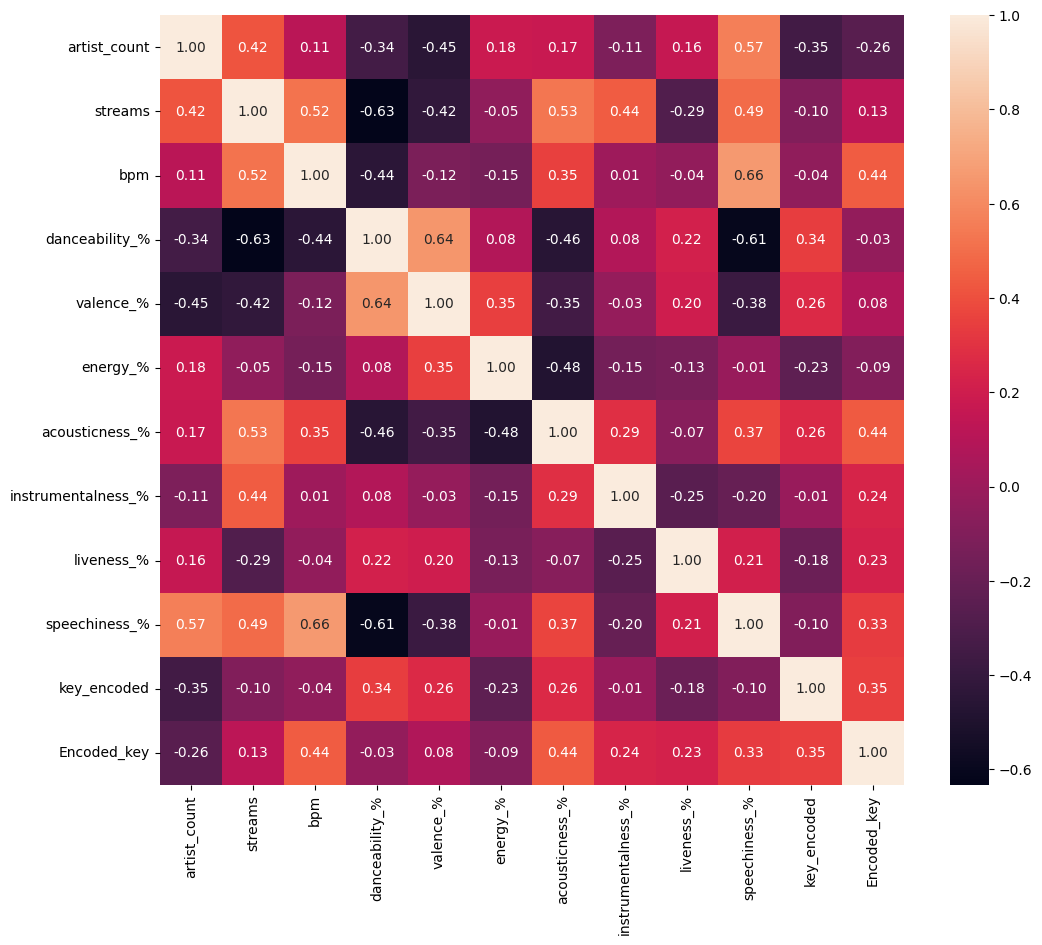

In [236]:
#Create df based only on pop genre
latinoDF = spotifyCombined[spotifyCombined['track_genre'].isin(['latino'])]
latinoDF = latinoDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
latinoStandard = pd.DataFrame(scaler.fit_transform(latinoDF), columns=latinoDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(latinoDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [237]:
#Train the model
X = latinoStandard.drop('streams', axis=1)
y = latinoStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
latinoLasso = latinoStandard[negFeat + ['streams']]

Best alpha: 0.6686572689073628
Mean Squared Error: 1.516294274281356
               Feature  Coefficient
0         artist_count          0.0
1                  bpm          0.0
2       danceability_%         -0.0
3            valence_%         -0.0
4             energy_%         -0.0
5       acousticness_%          0.0
6   instrumentalness_%          0.0
7           liveness_%         -0.0
8        speechiness_%          0.0
9          key_encoded         -0.0
10         Encoded_key          0.0


### Indie-pop

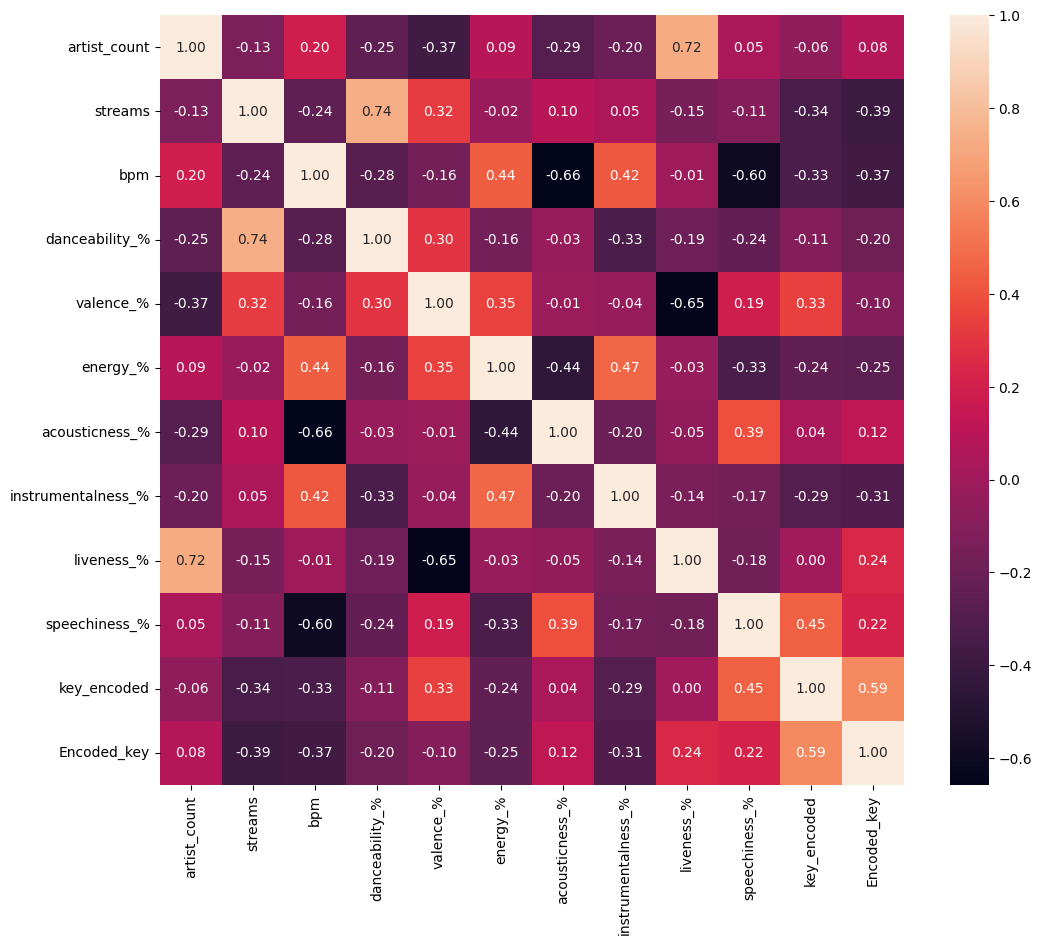

In [238]:
#Create df based only on pop genre
ipopDF = spotifyCombined[spotifyCombined['track_genre'].isin(['indie-pop'])]
ipopDF = ipopDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
ipopStandard = pd.DataFrame(scaler.fit_transform(ipopDF), columns=ipopDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(ipopDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

Correlation seems high for danceability

In [239]:
# Extract features (X) and target values (y) from the dataframe
X =  ipopStandard[['danceability_%']]
y = ipopStandard['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 3.8909207487830404
Random Forrest Mean Squared Error: 3.882578305325634
Tree Regression Mean Squared Error: 1.9466376260193865


Take a look at lasso regression

In [240]:
#Train the model
X = ipopStandard.drop('streams', axis=1)
y = ipopStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
ipopLasso = ipopStandard[negFeat + ['streams']]

Best alpha: 0.06328618378033626
Mean Squared Error: 4.35765529771476
               Feature  Coefficient
0         artist_count    -0.000000
1                  bpm     0.000000
2       danceability_%     0.000000
3            valence_%     0.000000
4             energy_%     0.000000
5       acousticness_%    -0.000000
6   instrumentalness_%     0.125784
7           liveness_%     0.000000
8        speechiness_%    -0.042424
9          key_encoded     0.000000
10         Encoded_key     0.000000


In [241]:
# Extract features (X) and target values (y) from the dataframe
X =  ipopLasso.drop('streams', axis=1)
y = ipopLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 4.468971540972174
Random Forrest Mean Squared Error: 4.788831274348435
Tree Regression Mean Squared Error: 2.149122118932764


### Rock

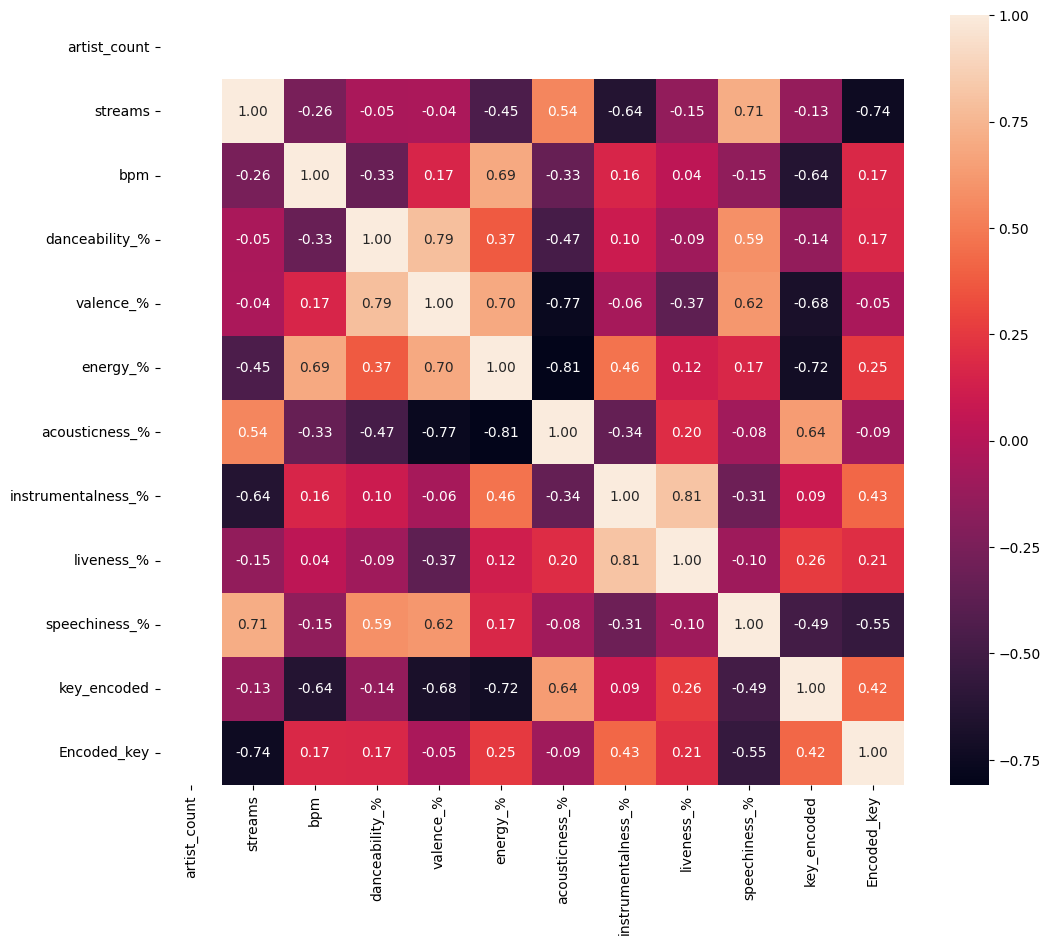

In [242]:
#Create df based only on pop genre
rockDF = spotifyCombined[spotifyCombined['track_genre'].isin(['rock'])]
rockDF = rockDF.select_dtypes(include=['int', 'float'])
#Need to standardize the data
scaler = StandardScaler()
# Fit and transform the DataFrame
rockStandard = pd.DataFrame(scaler.fit_transform(rockDF), columns=rockDF.columns)
# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
sns.heatmap(rockDF.corr(), annot=True, fmt=".2f")

# Show the plot
plt.show()

In [243]:
# Extract features (X) and target values (y) from the dataframe
X =  rockStandard[['Encoded_key', 'speechiness_%', 'instrumentalness_%', 'acousticness_%', 'energy_%']]
y = rockStandard['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 1.3531963698750853
Random Forrest Mean Squared Error: 1.58858753774637
Tree Regression Mean Squared Error: 1.1932994224739015


In [244]:
#Train the model
X = rockStandard.drop('streams', axis=1)
y = rockStandard['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Lasso regression model
# Instantiate and fit the LassoCV model
lasso_cv = LassoCV(cv=4)  # Use 5-fold cross-validation
lasso_cv.fit(X_train, y_train)

# Print the best alpha parameter found
print("Best alpha:", lasso_cv.alpha_)

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Create a DataFrame to store the coefficients and corresponding feature names
coeffDF = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
print(coeffDF)
# Filter out coefficients that are negative
negCoeffDF = coeffDF[abs(coeffDF['Coefficient']) > 0]

# Extract feature names with negative coefficients
negFeat = negCoeffDF['Feature'].tolist()

# Create a new DataFrame based on features with negative coefficients
rockLasso = rockStandard[negFeat + ['streams']]

Best alpha: 0.0008758349327843193
Mean Squared Error: 1.5997759281136426
               Feature  Coefficient
0         artist_count     0.000000
1                  bpm    -0.000000
2       danceability_%    -0.000000
3            valence_%    -0.000000
4             energy_%    -0.099322
5       acousticness_%     0.388971
6   instrumentalness_%    -0.384983
7           liveness_%    -0.000000
8        speechiness_%     0.000000
9          key_encoded     0.000000
10         Encoded_key    -0.000000


In [245]:
# Extract features (X) and target values (y) from the dataframe
X =  rockLasso.drop('streams', axis=1)
y = rockLasso['streams']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

# Random Forrest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forrest Mean Squared Error:", mse)

#Tree Regression
tree_regressor = DecisionTreeRegressor()
# Fit the regressor to the training data
tree_regressor.fit(X_train, y_train)
# Predict the target values for the test set
y_pred = tree_regressor.predict(X_test)
# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Tree Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 1.5998339423377035
Random Forrest Mean Squared Error: 2.5402303885836717
Tree Regression Mean Squared Error: 2.0397512470618007


## Clustering

Determine optimal amount of clusters

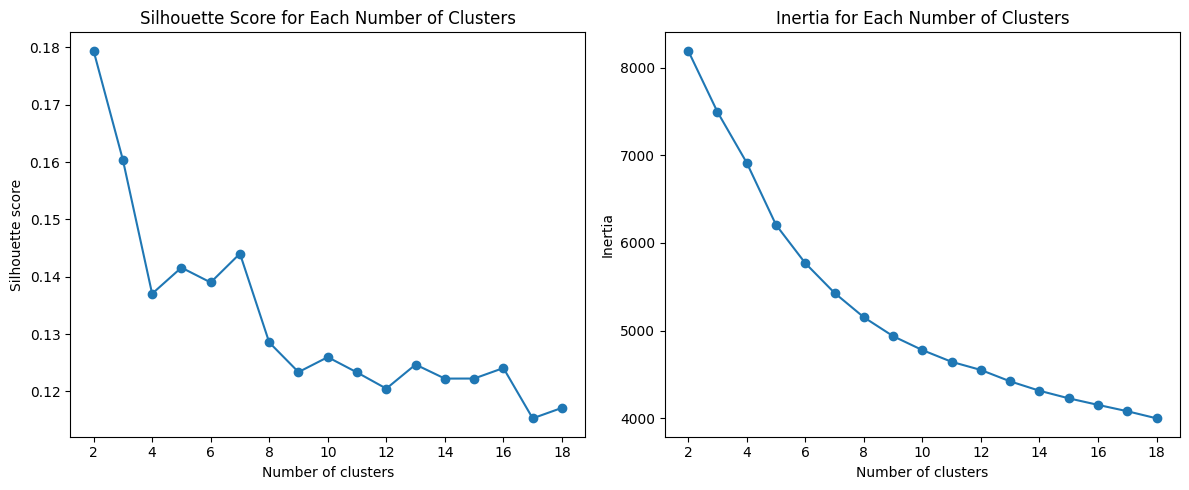

In [246]:
#Remove streams (our response variable)
spotifySmallKmeans = spotifyNumericStandard.drop(columns=['streams'])

# Initialize lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Range of clusters to try
range_of_clusters = range(2, 19)

# Calculate silhouette score and inertia value for each number of clusters
for n_clusters in range_of_clusters:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spotifySmallKmeans)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(spotifySmallKmeans, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculate inertia value
    inertia_values.append(kmeans.inertia_)

# Plot silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_of_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Each Number of Clusters')

# Plot inertia values
plt.subplot(1, 2, 2)
plt.plot(range_of_clusters, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Each Number of Clusters')

plt.tight_layout()
plt.show()

Looks like 7 clusters is the optimal here. It is not very indicative however as the silhouette score is not the highest, but this is where it hops back up and the inertia value starts to level off.

In [247]:
# Instantiate and fit KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(spotifySmallKmeans)
# Get cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=spotifySmallKmeans.columns)

# Predict cluster labels for each customer
cluster_labels = kmeans.predict(spotifySmallKmeans)
spotifySmallKmeans = spotifySmallKmeans * spotifyNumericDF.drop(columns=['streams','artist_count']).std() + spotifyNumericDF.drop(columns=['streams','artist_count']).mean()
spotifySmallKmeans['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_summary = spotifySmallKmeans.groupby('Cluster').agg({
    'bpm': ['mean', 'min', 'max', 'count'],
    'danceability_%': ['mean', 'min', 'max', 'count'],
    'valence_%': ['mean', 'min', 'max', 'count'],
    'energy_%': ['mean', 'min', 'max', 'count'],
    'acousticness_%': ['mean', 'min', 'max', 'count'],
    'instrumentalness_%': ['mean', 'min', 'max', 'count'],
    'liveness_%': ['mean', 'min', 'max', 'count'],
    'speechiness_%': ['mean', 'min', 'max', 'count'],
    'key_encoded': ['mean', 'min', 'max', 'count'],
}).reset_index()

print("\nCluster Summary:")
display(cluster_summary)


Cluster Summary:


Cluster         bpm                              danceability_%             \
                 mean        min         max count           mean        min   
0       0  143.784639  79.977602  206.043900   181      55.430397  23.977392   
1       1  114.996018  66.970761  179.029693   100      65.859418  32.982128   
2       2  115.996544  64.969709  188.034429   168      55.112814  22.976866   
3       3  122.764809  78.977076  180.030220    17      60.349461  33.982654   
4       4  115.341027  76.976023  176.028115   290      76.805174  46.989494   
5       5  116.165464  73.974445  206.043900    77      74.601418  52.992651   
6       6  127.706092  70.972866  186.033377   118      74.266551  43.987916   

                    valence_%  ... liveness_%       speechiness_%             \
         max count       mean  ...        max count          mean        min   
0  88.011067   181  39.104039  ...  42.012524   181      6.650097   2.996242   
1  92.013172   100  53.591160  ...  97.041464   100      8.088920   2.996242   
2  78.005806   168  35.235555  ...  64.024100   168      6.355151   1.995716   
3  92.013172    17  32.225218  ...  30.006210    17      5.409276   2.996242   
4  96.015277   290  66.873663  ...  38.010420   290      7.015597   1.995716   
5  93.013698    77  57.808573  ...  42.012524    77      8.869461   2.996242   
6  95.014751   118  51.847701  ...  53.018312   118     31.824962  17.003609   

                   key_encoded                             
         max count        mean       min        max count  
0  29.009923   181    5.043829 -0.003024  11.002764   181  
1  30.010449   100    6.640470 -0.003024  11.002764   100  
2  38.014658   168    6.119244 -0.003024  11.002764   168  
3   9.999925    17    5.941279 -0.003024  11.002764    17  
4  24.007292   290    6.034634 -0.003024  11.002764   290  
5  30.010449    77    5.272478 -0.003024  11.002764    77  
6  64.028339   118    5.109835 -0.003024  11.002764   118  

[7 rows x 37 columns]

# Conclusion Based on Joined Dataset Exploration and Analysis

# References and Links

Automatic Music Popularity Prediction System​

Stanford University. (2015). Automatic Music Popularity Prediction System: https://cs229.stanford.edu/proj2015/140_report.pdf​

Big Data Could Help Predict the Next Chart-Topping Hit​

Carleton University. (2019, February 1). Big Data Could Help Predict the Next Chart-Topping Hit [News article]. https://newsroom.carleton.ca/story/big-data-predict-song-popularity/​

Top Spotify Songs 2023​

Nelsiriyawithana, Y. (n.d.). Top Spotify Songs 2023. [Dataset]. https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023​

Spotify Tracks Dataset​

Maharishi Pandya. (n.d.). Spotify Tracks Dataset. [Dataset]. https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset​

Git: https://github.com/joey-beightol/spotify_stream_analysis